In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io
import seaborn as sns

%matplotlib inline

# EFTP: analysis of $\|F(x^N)\|^2$

## $L = 1, \mu = 0$

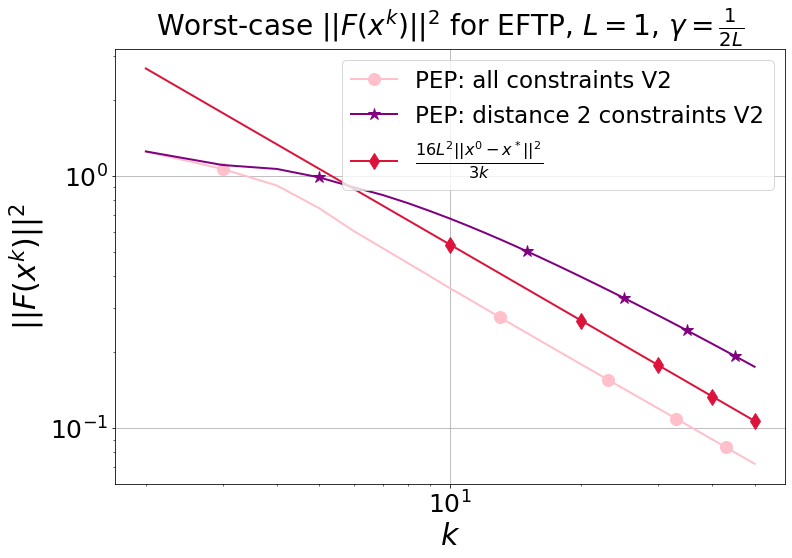

In [2]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 50

worst_case_sq_norm = np.array([])
worst_case_sq_norm_2_points = np.array([])
worst_case_sq_norm_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints = np.array([])
# worst_case_sq_norm_4_points = np.array([])
# worst_case_sq_norm_8_points = np.array([])
guessed_upper_bound = np.array([])

gamma_str = '%.6f' % gamma

for N in range(N_max-1):
#     res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm = np.append(worst_case_sq_norm, res['res_norm'][0][0])
#     res_2_points = scipy.io.loadmat('dump/EFTP_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
    res_more = scipy.io.loadmat('dump/EFTP_2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_more_constraints = np.append(worst_case_sq_norm_more_constraints, res_more['res_norm'][0][0])
    res_2_points_more = scipy.io.loadmat('dump/EFTP_2_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points_more_constraints = np.append(worst_case_sq_norm_2_points_more_constraints, res_2_points_more['res_norm'][0][0])
#     res_4_points = scipy.io.loadmat('dump/OG_norm_4_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_4_points = np.append(worst_case_sq_norm_4_points, res_4_points['res_norm'][0][0])
#     res_8_points = scipy.io.loadmat('dump/OG_norm_8_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_8_points = np.append(worst_case_sq_norm_8_points, res_8_points['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(N+2)))
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(x^k)||^2$ for EFTP, $L = 1$, $\gamma = \frac{1}{2L}$", fontsize=28)

# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm, linewidth=2,
#              markersize = 12, marker = "o",
#              markevery=range(0, N_max-1, 10), color="forestgreen",
#              label='PEP: all constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_more_constraints, linewidth=2,
             markersize = 12, marker = "o",
             markevery=range(1, N_max-1, 10), color="pink",
             label='PEP: all constraints V2')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points, linewidth=2,
#              markersize = 12, marker = "*",
#              markevery=range(2, N_max-1, 10), color="darkblue",
#              label='PEP: distance 2 constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints, linewidth=2,
             markersize = 12, marker = "*",
             markevery=range(3, N_max-1, 10), color="purple",
             label='PEP: distance 2 constraints V2')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_4_points, linewidth=2,
#              markersize = 12, marker = "^",
#              markevery=range(4, N_max, 10), color="purple",
#              label='PEP: distance 4 constraints')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_8_points, linewidth=2,
#              markersize = 12, marker = ">",
#              markevery=range(6, N_max, 10), color="orange",
#              label='PEP: distance 8 constraints')
plt.semilogy(np.array(range(N_max-1))+2, guessed_upper_bound, linewidth=2, 
             markersize = 12, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{16L^2||x^0 - x^*||^2}{3k}$')


plt.legend(loc='upper right', fontsize=23)
plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/EFTP_norm_L_"+str(L)+'_N_'+str(N_max)+".png", bbox_inches='tight')

# Guessing dual variables

## $L = 1, \mu = 0$

## $\gamma = \frac{1}{2L}$

In [37]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

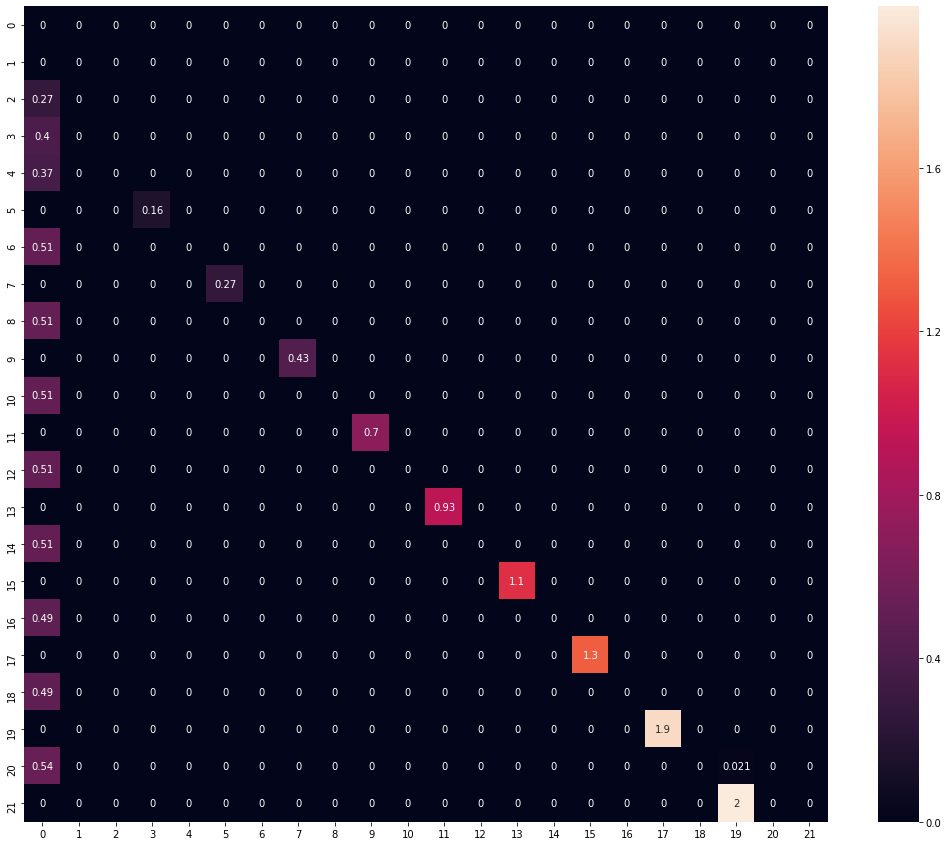

In [38]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

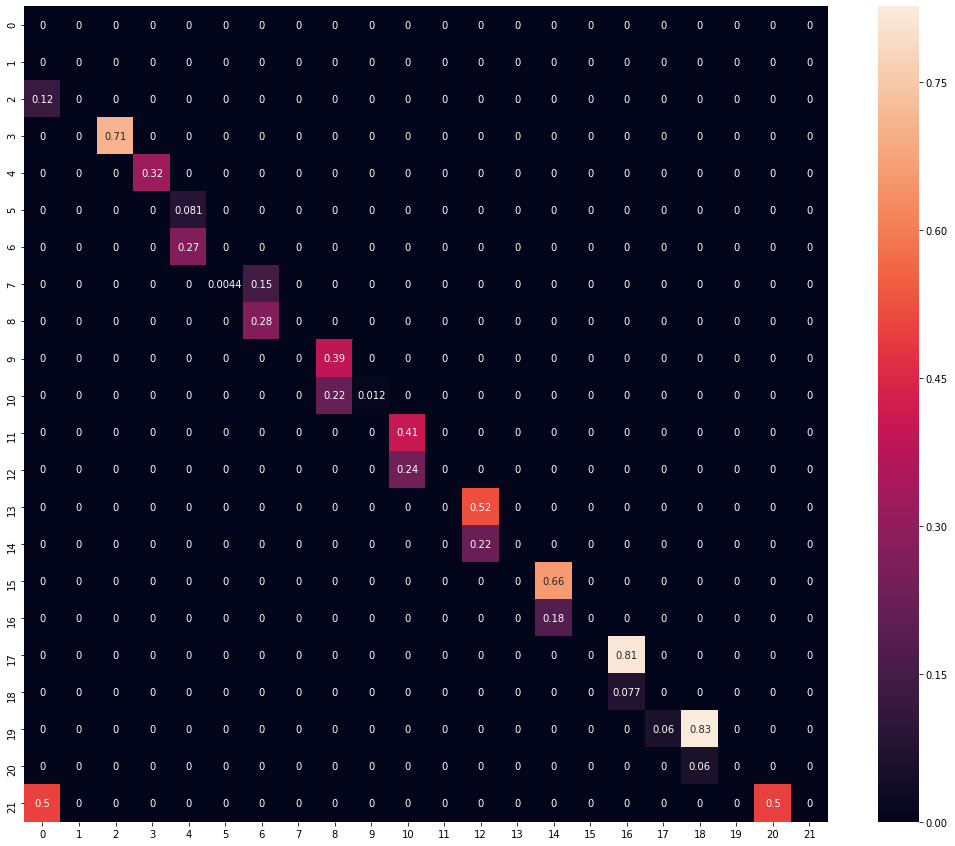

In [39]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [40]:
res_with_duals['res_norm']

array([[0.67641685]])

In [41]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0


idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

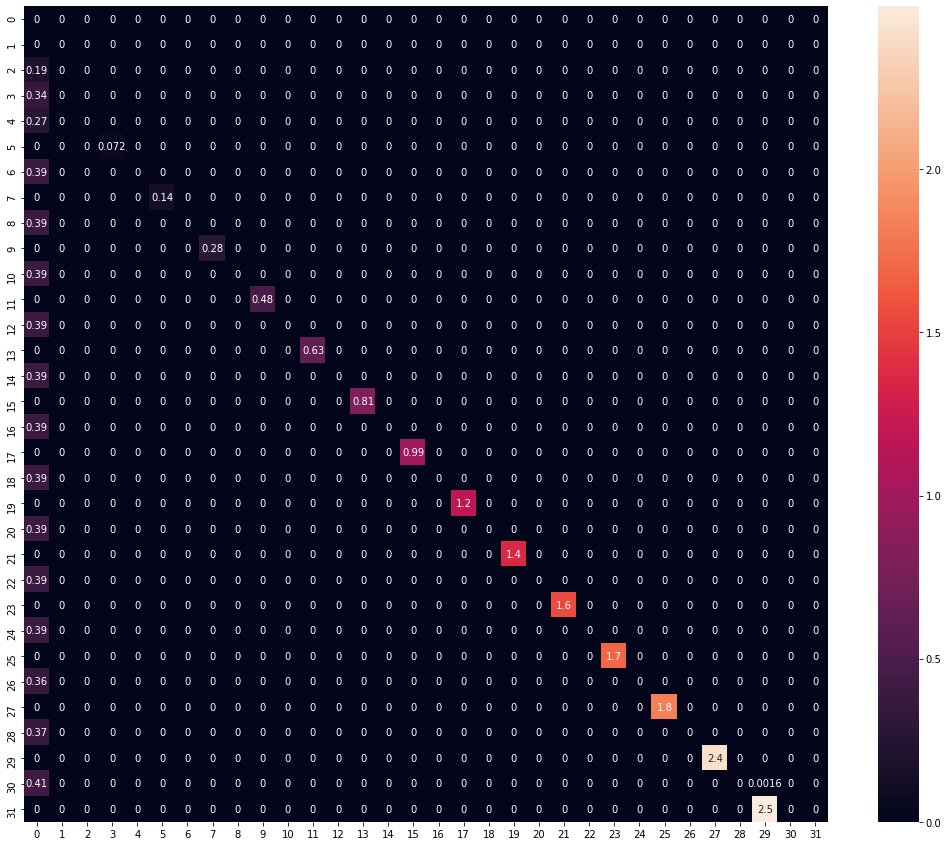

In [42]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

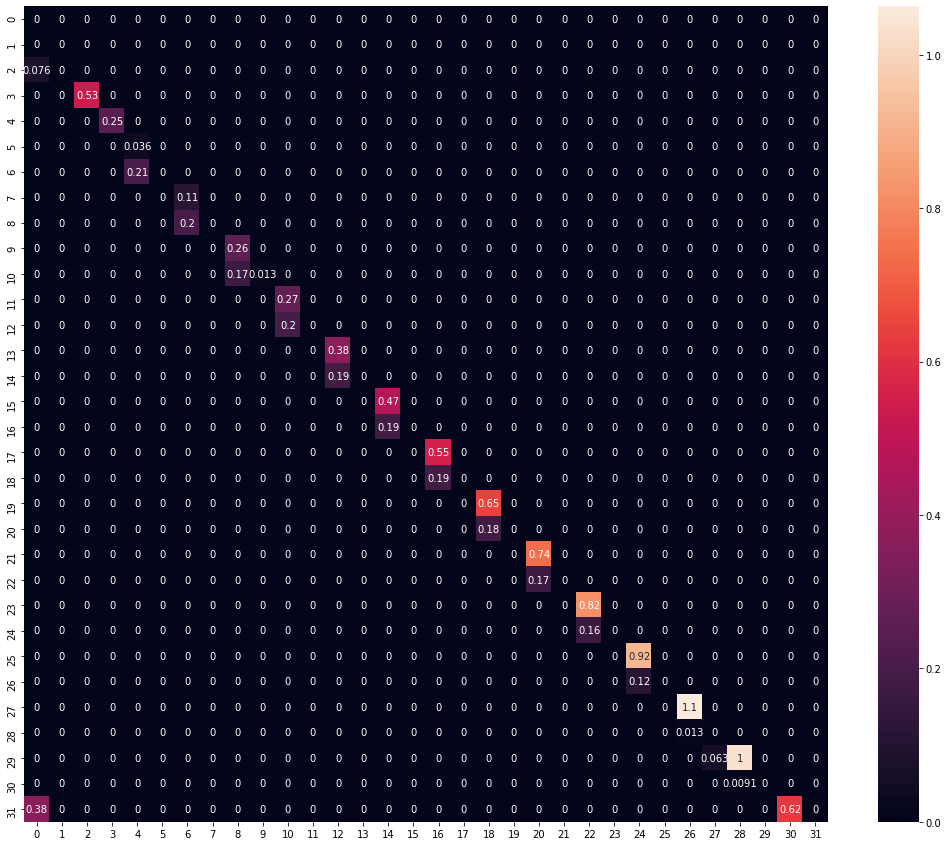

In [43]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [44]:
res_with_duals['res_norm']

array([[0.50221234]])

In [45]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 20
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0


idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

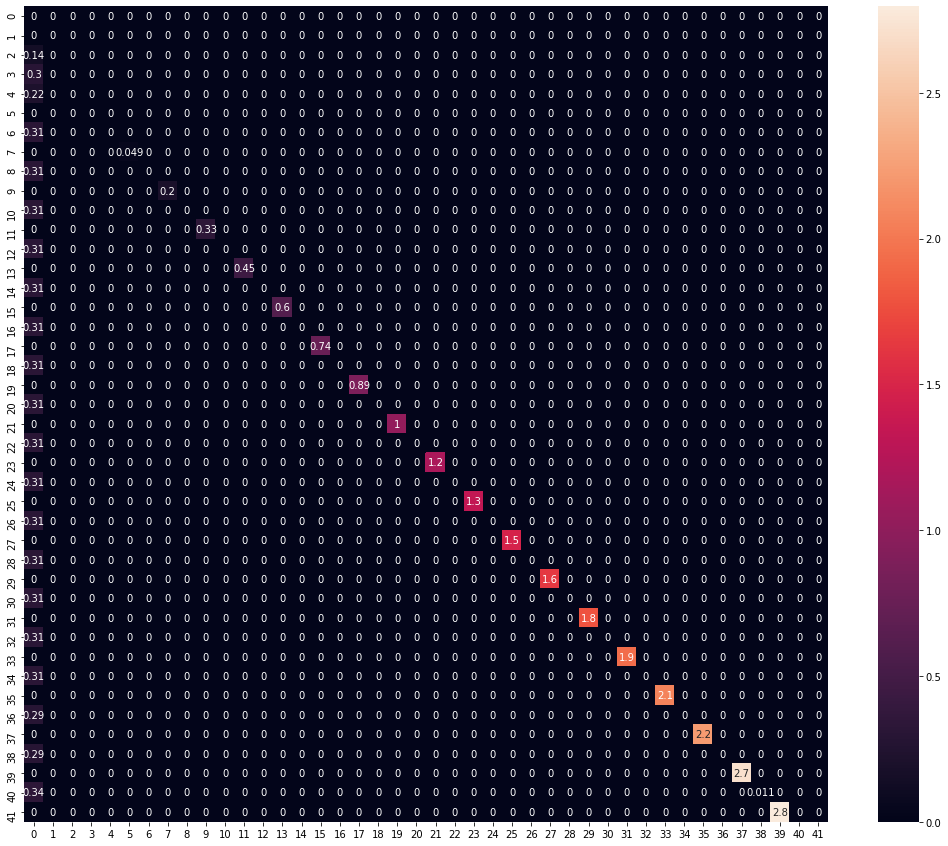

In [46]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

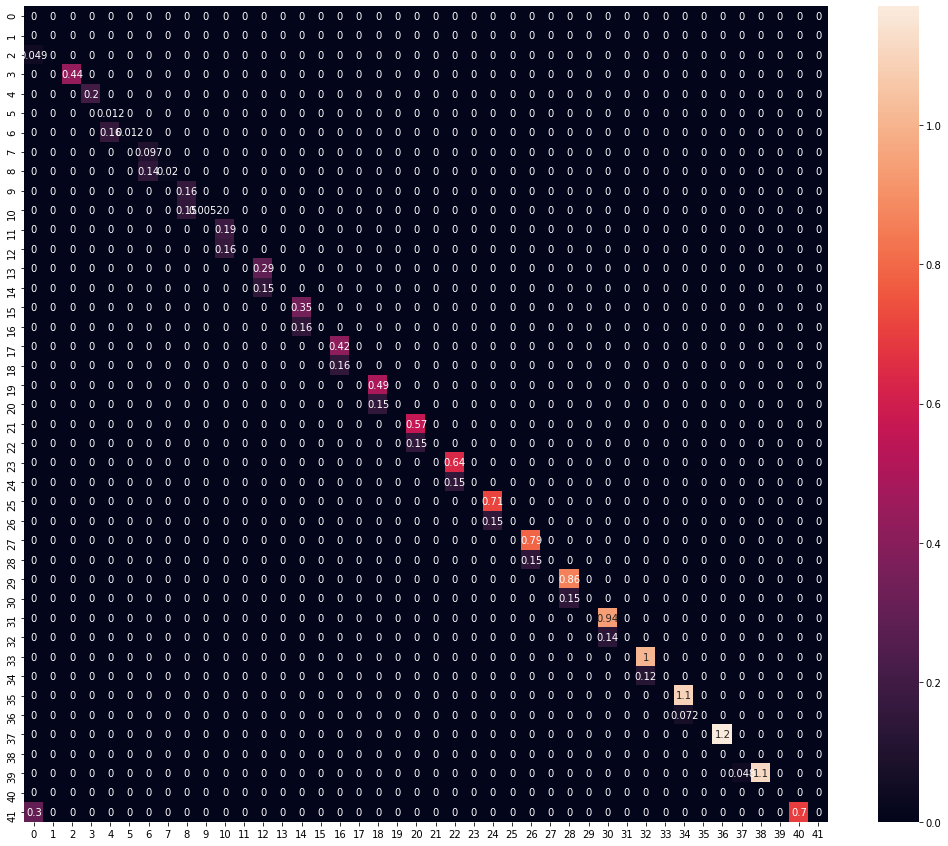

In [47]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [48]:
res_with_duals['res_norm']

array([[0.39732614]])

## $\gamma = \frac{1}{4L}$

In [27]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0


idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

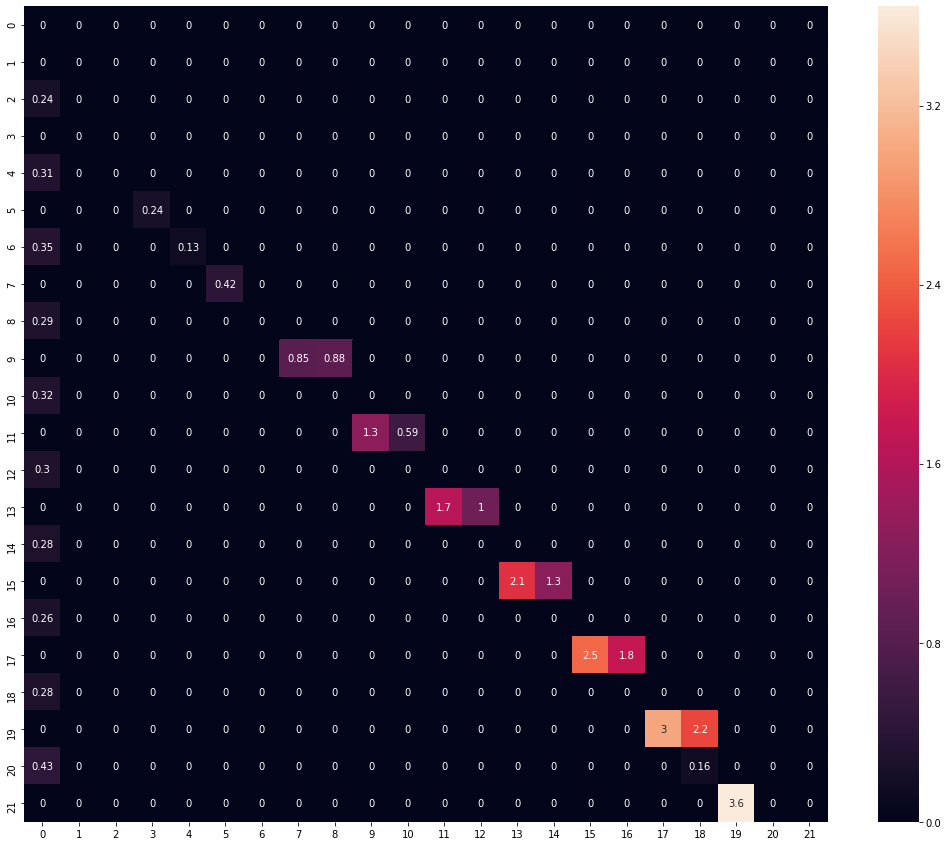

In [28]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

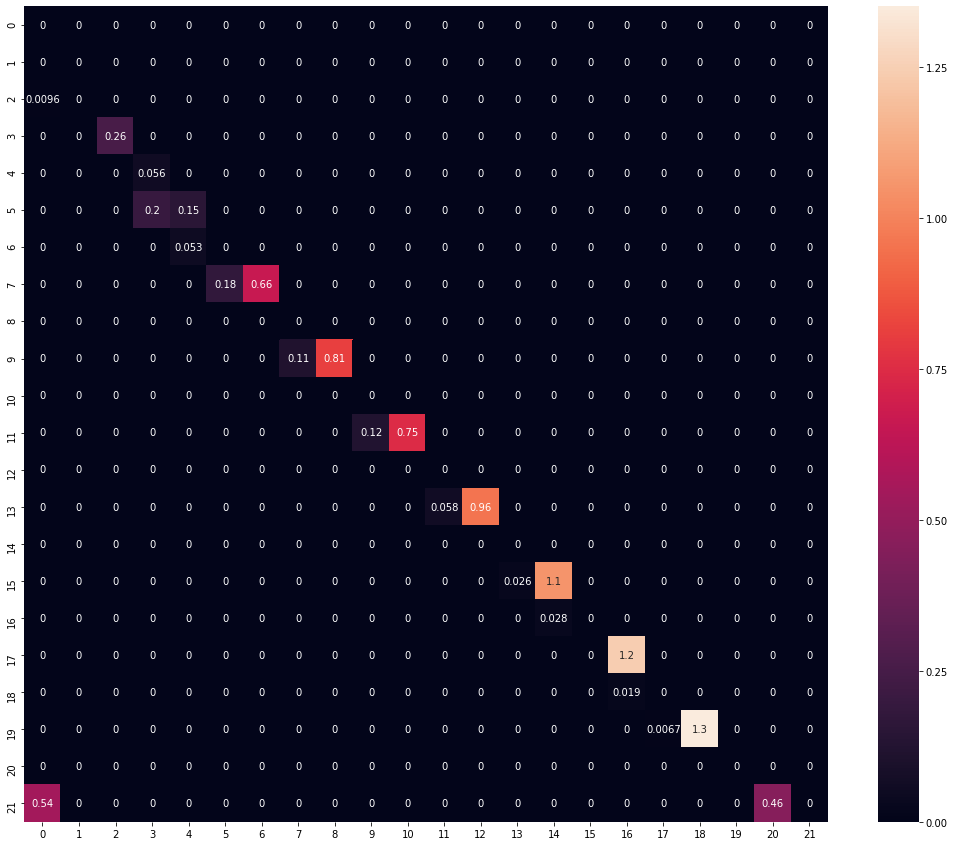

In [29]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [30]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0


idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

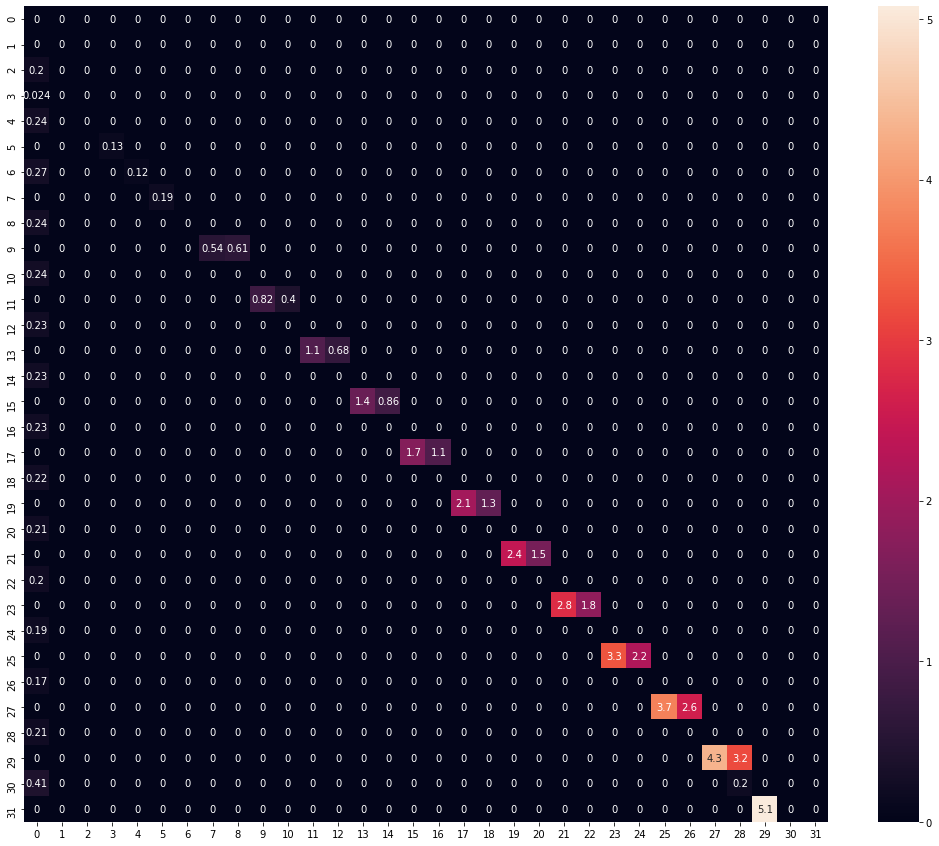

In [31]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

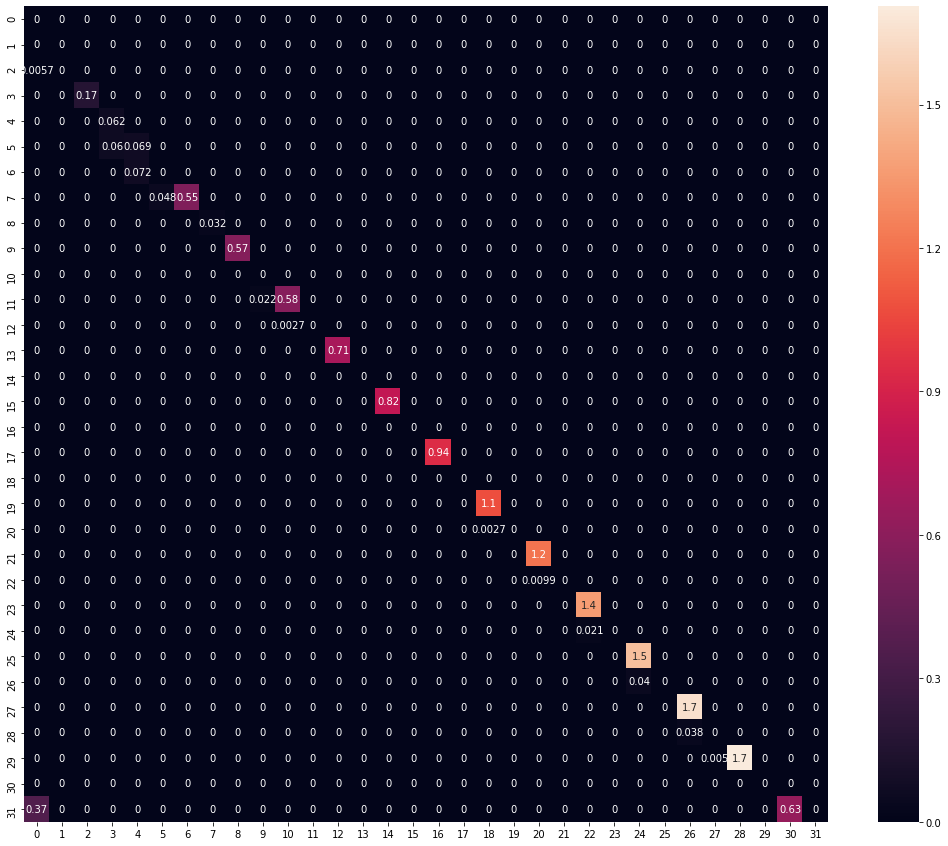

In [32]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [34]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 20
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0


idx = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            monotonicity_weights_matrix[i][j] = monotonicity_weights[idx]
            Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx]
            idx += 1

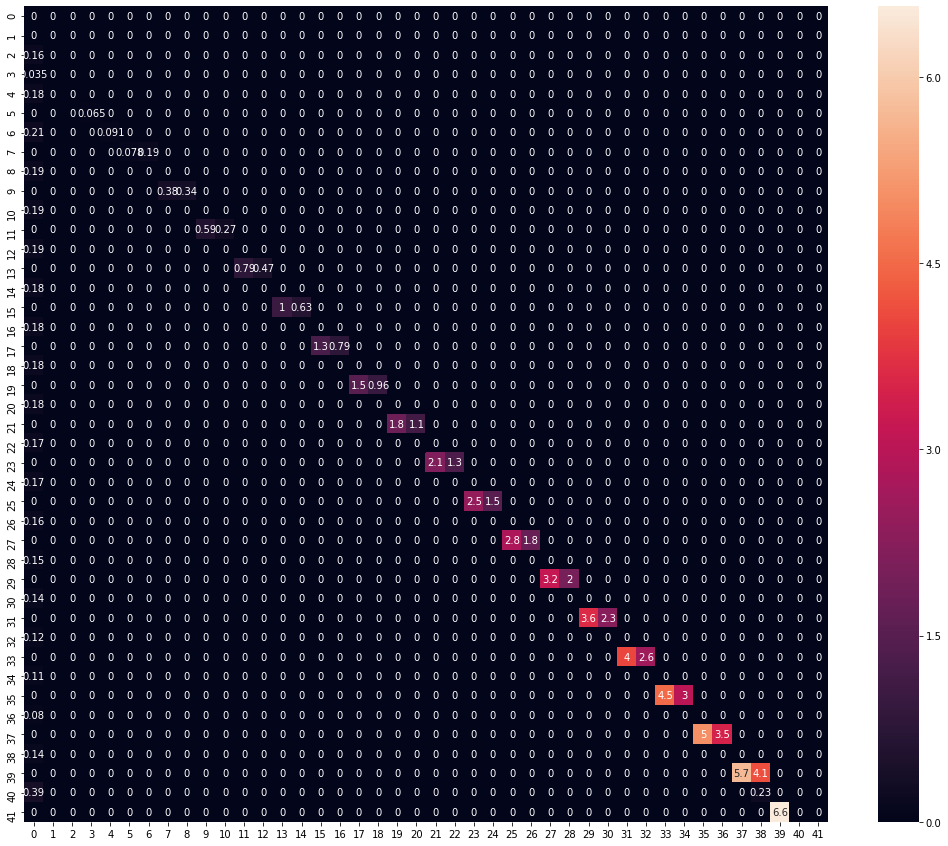

In [35]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

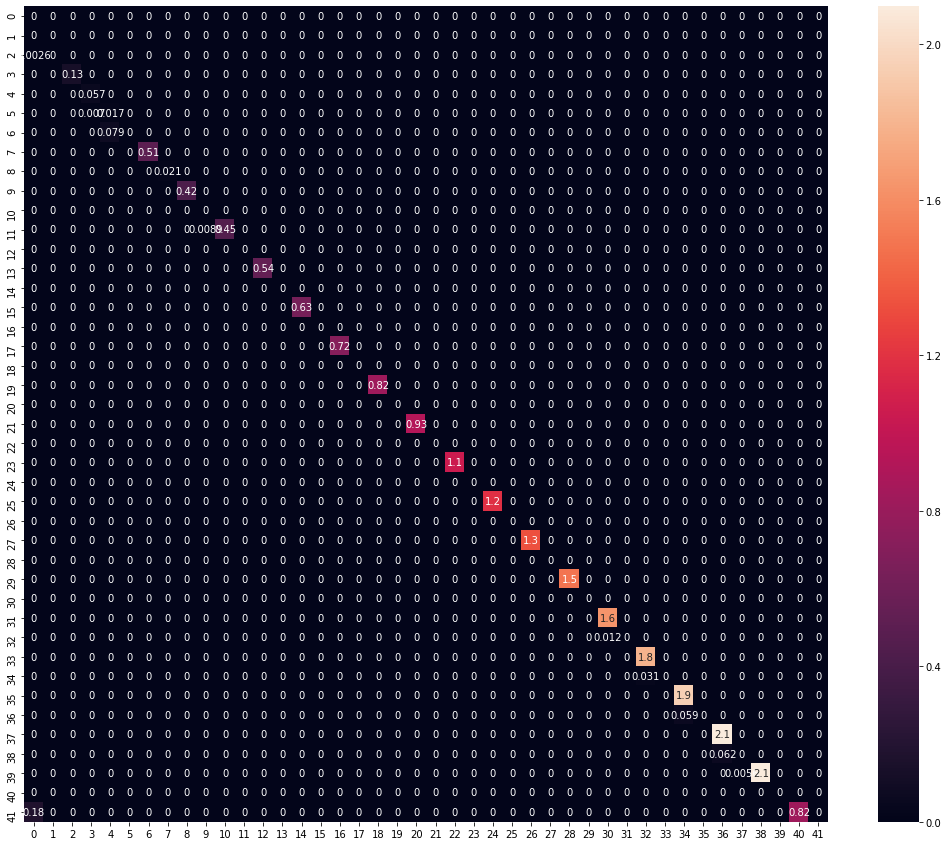

In [36]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

# EFTP: analysis of $\|F(x^N)\|^2$ (simplified constraints)

## $L = 1, \mu = 0$

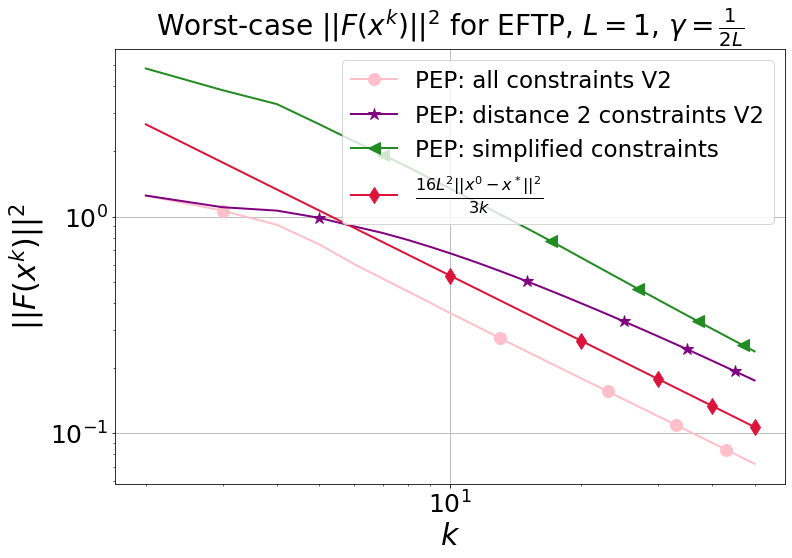

In [69]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 50

worst_case_sq_norm = np.array([])
worst_case_sq_norm_2_points = np.array([])
worst_case_sq_norm_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints_simpl = np.array([])
# worst_case_sq_norm_4_points = np.array([])
# worst_case_sq_norm_8_points = np.array([])
guessed_upper_bound = np.array([])

gamma_str = '%.6f' % gamma

for N in range(N_max-1):
#     res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm = np.append(worst_case_sq_norm, res['res_norm'][0][0])
#     res_2_points = scipy.io.loadmat('dump/EFTP_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
    res_more = scipy.io.loadmat('dump/EFTP_2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_more_constraints = np.append(worst_case_sq_norm_more_constraints, res_more['res_norm'][0][0])
    res_2_points_more = scipy.io.loadmat('dump/EFTP_2_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points_more_constraints = np.append(worst_case_sq_norm_2_points_more_constraints, res_2_points_more['res_norm'][0][0])
    res_2_points_more_simpl = scipy.io.loadmat('dump/EFTP_2_simplified_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points_more_constraints_simpl = np.append(worst_case_sq_norm_2_points_more_constraints_simpl, res_2_points_more_simpl['res_norm'][0][0])
#     res_4_points = scipy.io.loadmat('dump/OG_norm_4_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_4_points = np.append(worst_case_sq_norm_4_points, res_4_points['res_norm'][0][0])
#     res_8_points = scipy.io.loadmat('dump/OG_norm_8_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_8_points = np.append(worst_case_sq_norm_8_points, res_8_points['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(N+2)))
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(x^k)||^2$ for EFTP, $L = 1$, $\gamma = \frac{1}{2L}$", fontsize=28)

# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm, linewidth=2,
#              markersize = 12, marker = "o",
#              markevery=range(0, N_max-1, 10), color="forestgreen",
#              label='PEP: all constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_more_constraints, linewidth=2,
             markersize = 12, marker = "o",
             markevery=range(1, N_max-1, 10), color="pink",
             label='PEP: all constraints V2')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points, linewidth=2,
#              markersize = 12, marker = "*",
#              markevery=range(2, N_max-1, 10), color="darkblue",
#              label='PEP: distance 2 constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints, linewidth=2,
             markersize = 12, marker = "*",
             markevery=range(3, N_max-1, 10), color="purple",
             label='PEP: distance 2 constraints V2')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints_simpl, linewidth=2,
             markersize = 12, marker = "<",
             markevery=range(5, N_max-1, 10), color="forestgreen",
             label='PEP: simplified constraints')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_4_points, linewidth=2,
#              markersize = 12, marker = "^",
#              markevery=range(4, N_max, 10), color="purple",
#              label='PEP: distance 4 constraints')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_8_points, linewidth=2,
#              markersize = 12, marker = ">",
#              markevery=range(6, N_max, 10), color="orange",
#              label='PEP: distance 8 constraints')
plt.semilogy(np.array(range(N_max-1))+2, guessed_upper_bound, linewidth=2, 
             markersize = 12, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{16L^2||x^0 - x^*||^2}{3k}$')


plt.legend(loc='upper right', fontsize=23)
plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

# plt.savefig("plot/EFTP_norm_L_"+str(L)+'_N_'+str(N_max)+".png", bbox_inches='tight')

# Guessing dual variables

## $L = 1, \mu = 0$

## $\gamma = \frac{1}{2L}$

In [61]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

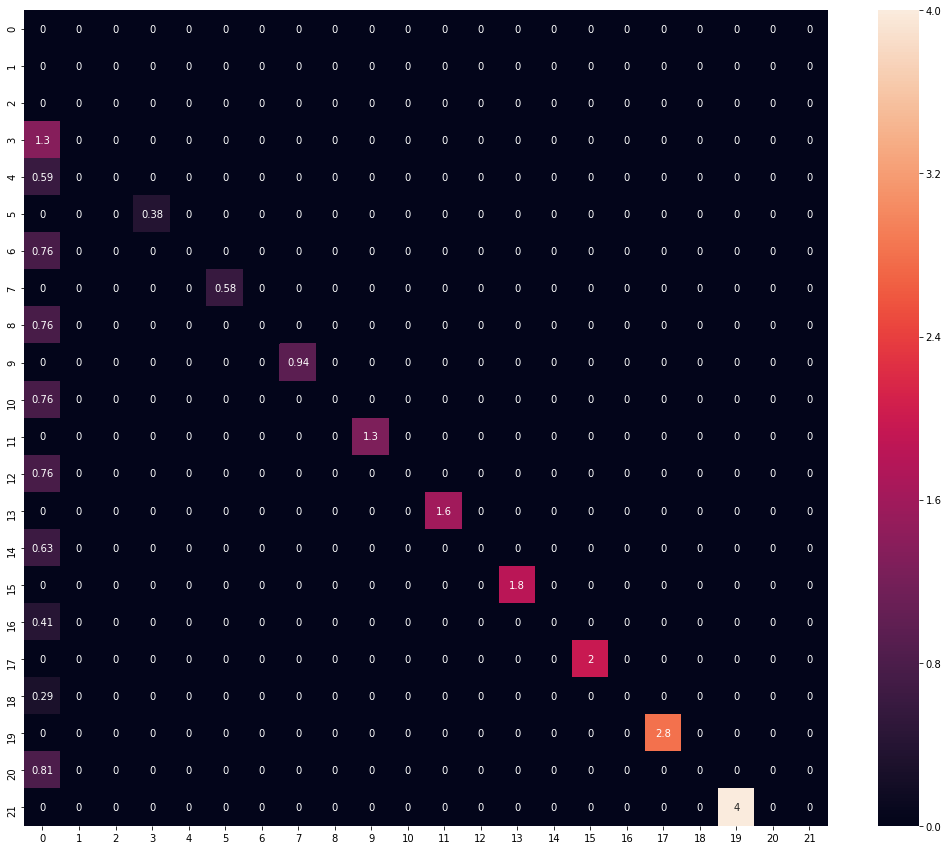

In [62]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

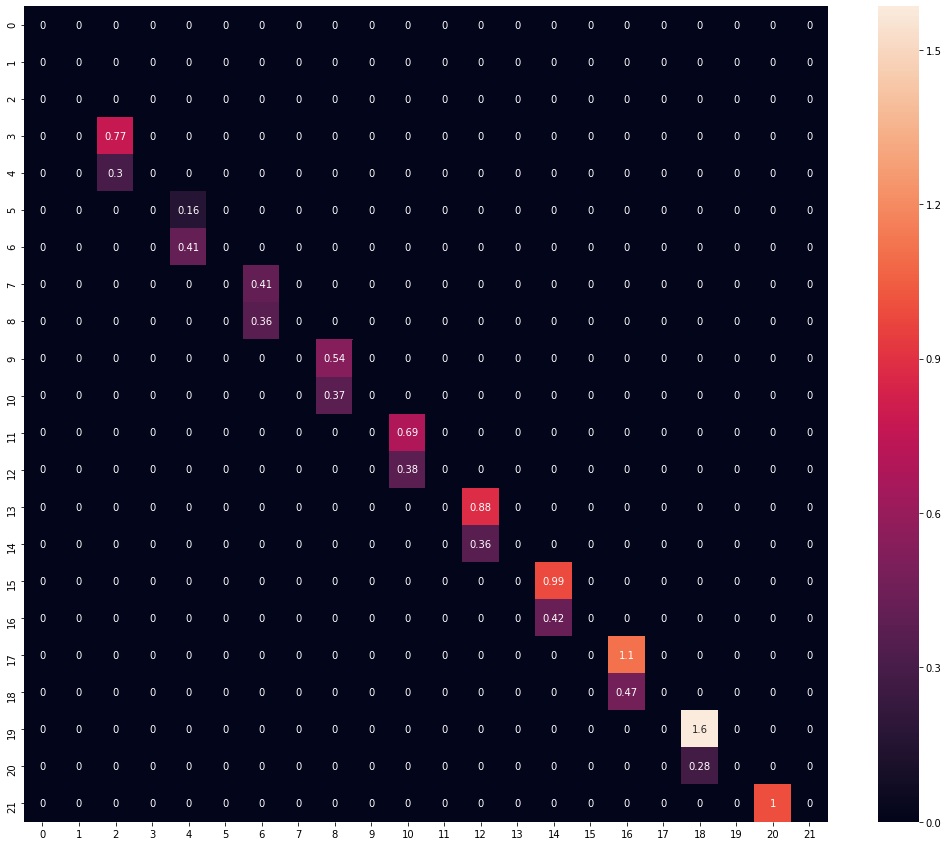

In [63]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [64]:
res_with_duals['res_norm']

array([[1.34552137]])

In [70]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

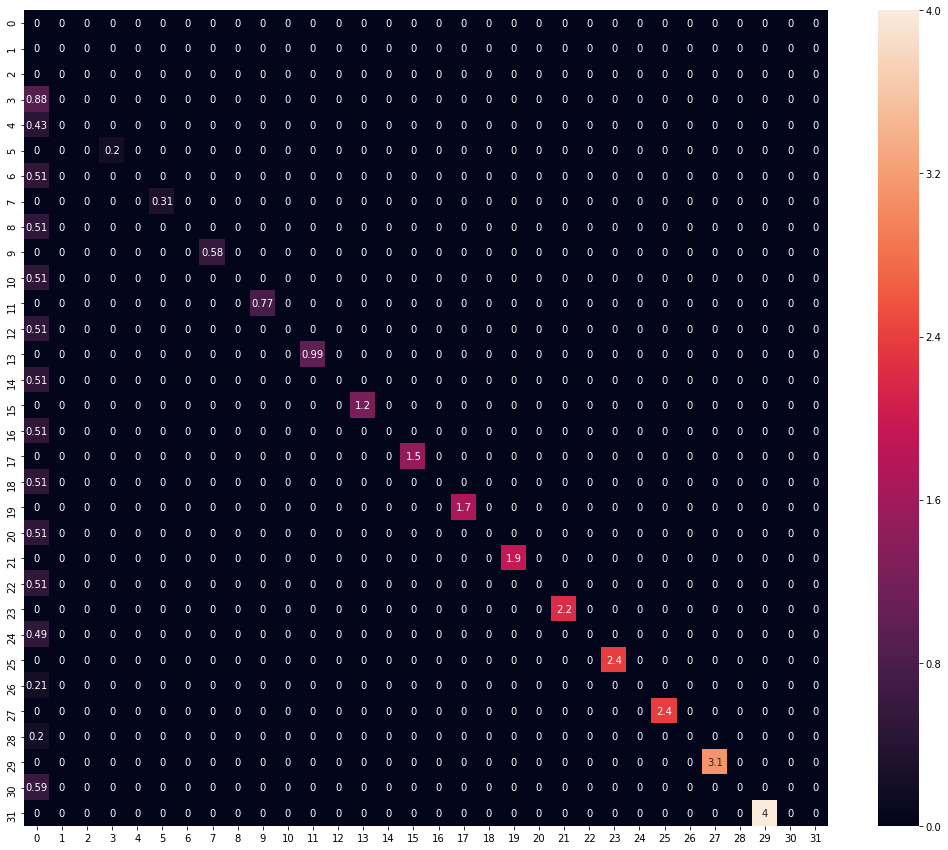

In [71]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

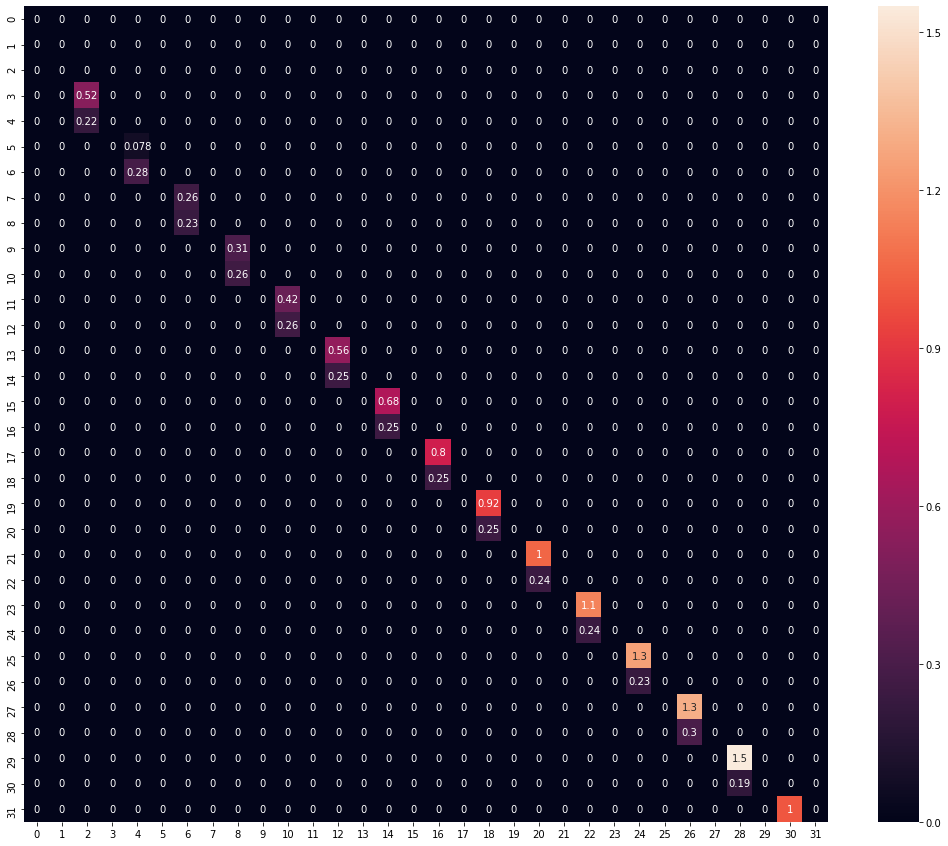

In [72]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [73]:
res_with_duals['res_norm']

array([[0.88260517]])

In [74]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 20

gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

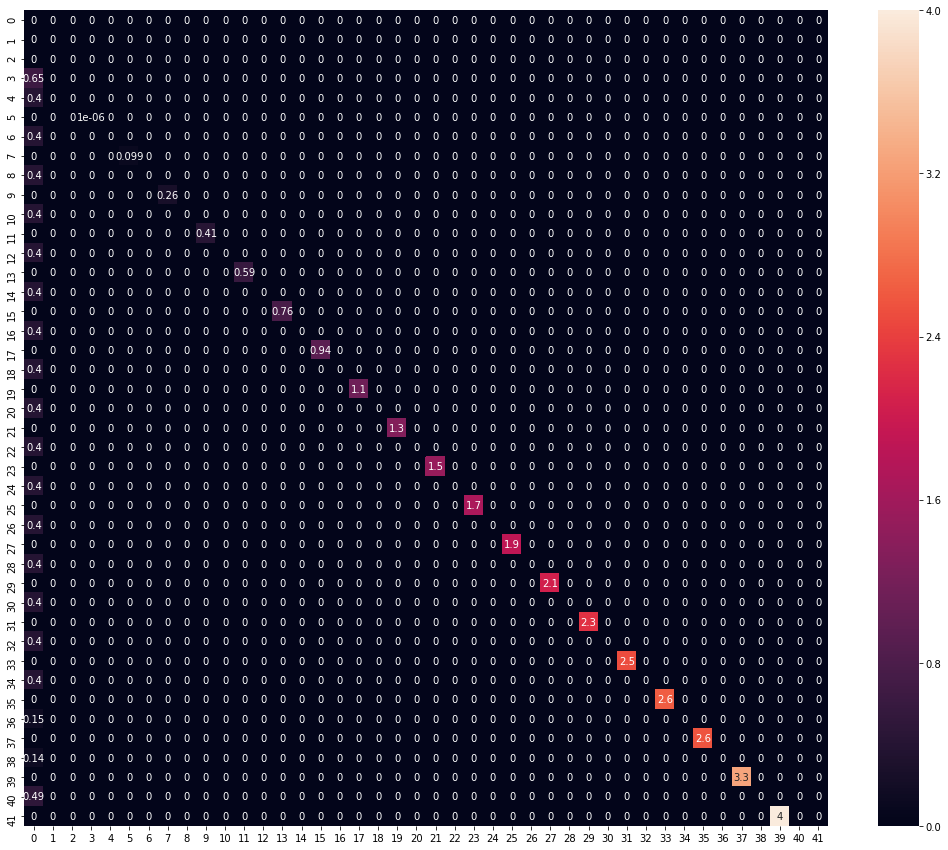

In [75]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

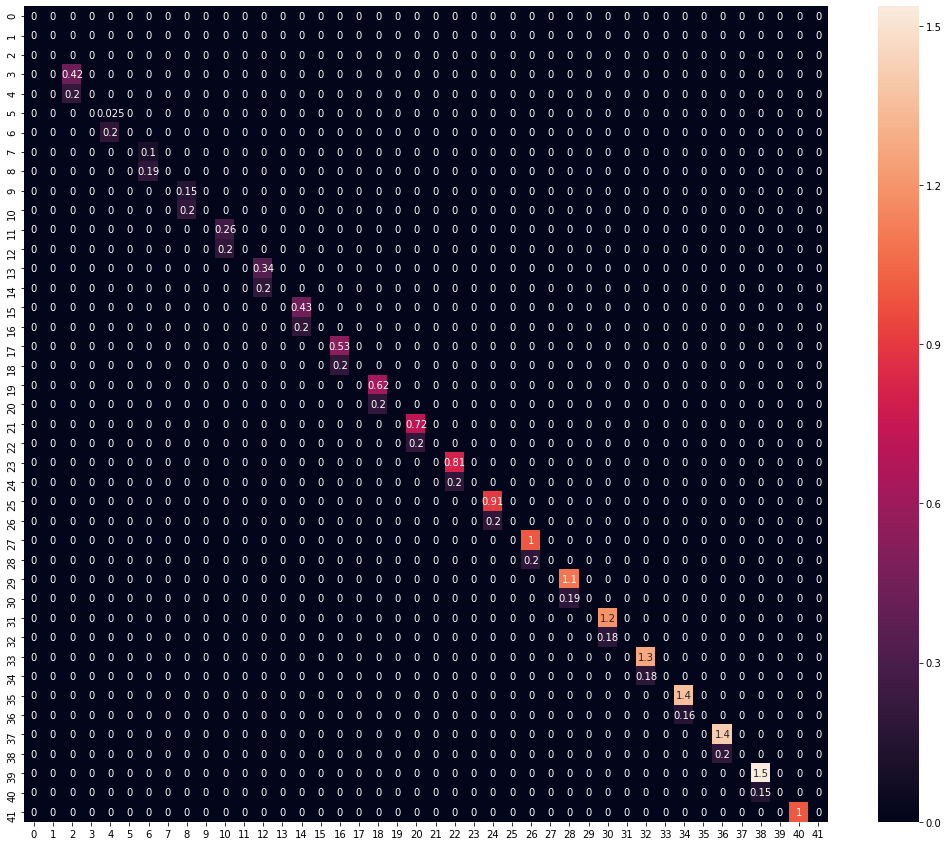

In [76]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [77]:
res_with_duals['res_norm']

array([[0.64518474]])

## $\gamma = \frac{1}{4L}$

In [78]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

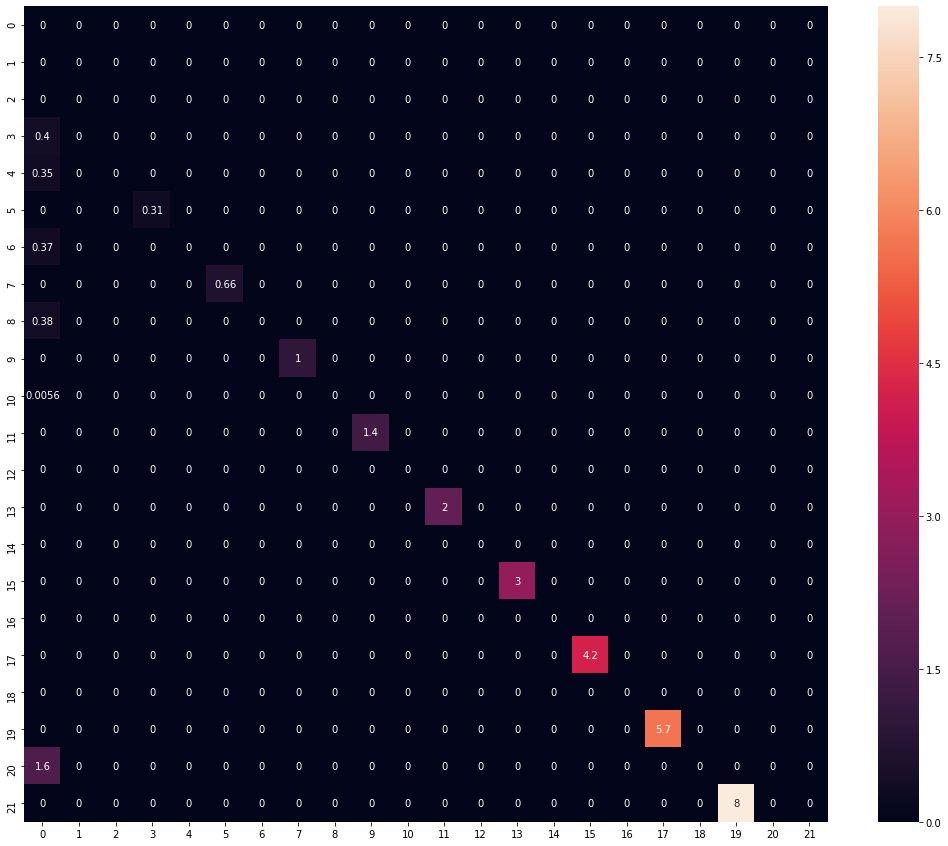

In [79]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

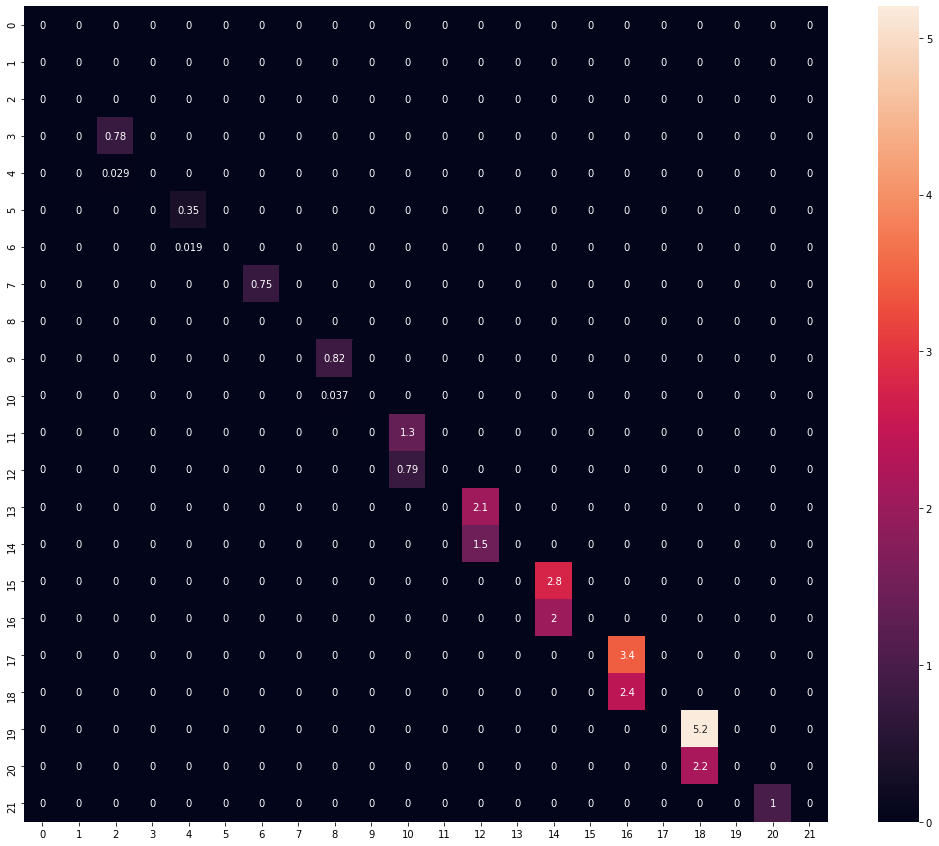

In [80]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [81]:
res_with_duals['res_norm']

array([[0.79765834]])

In [82]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

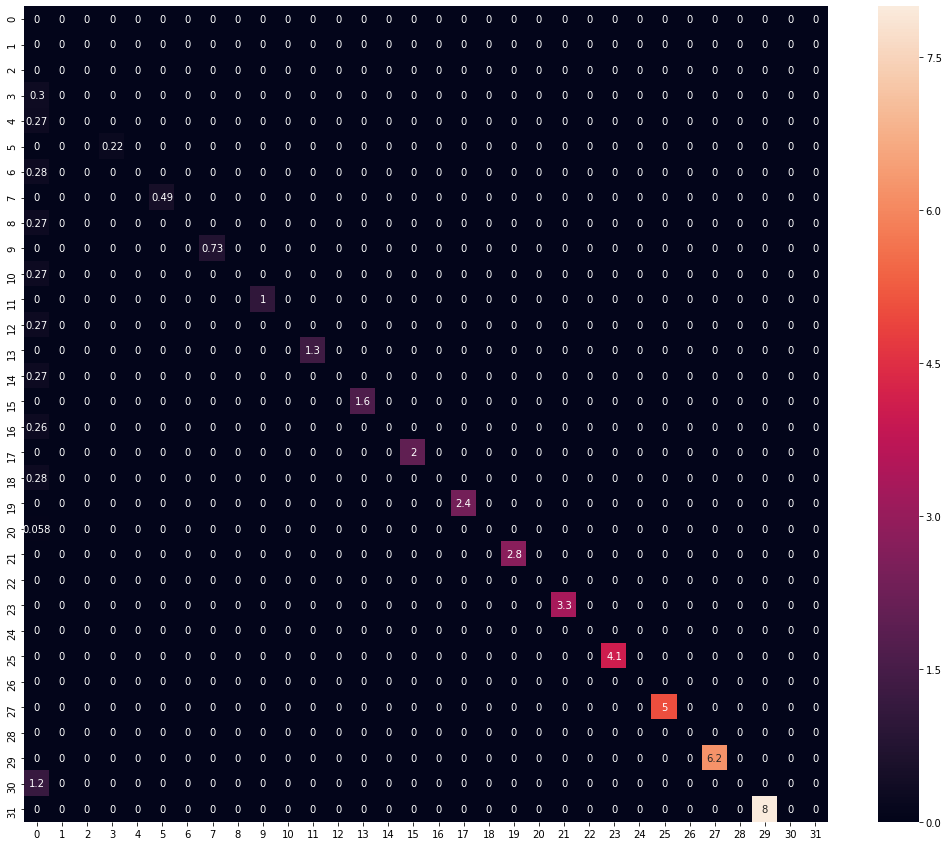

In [83]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

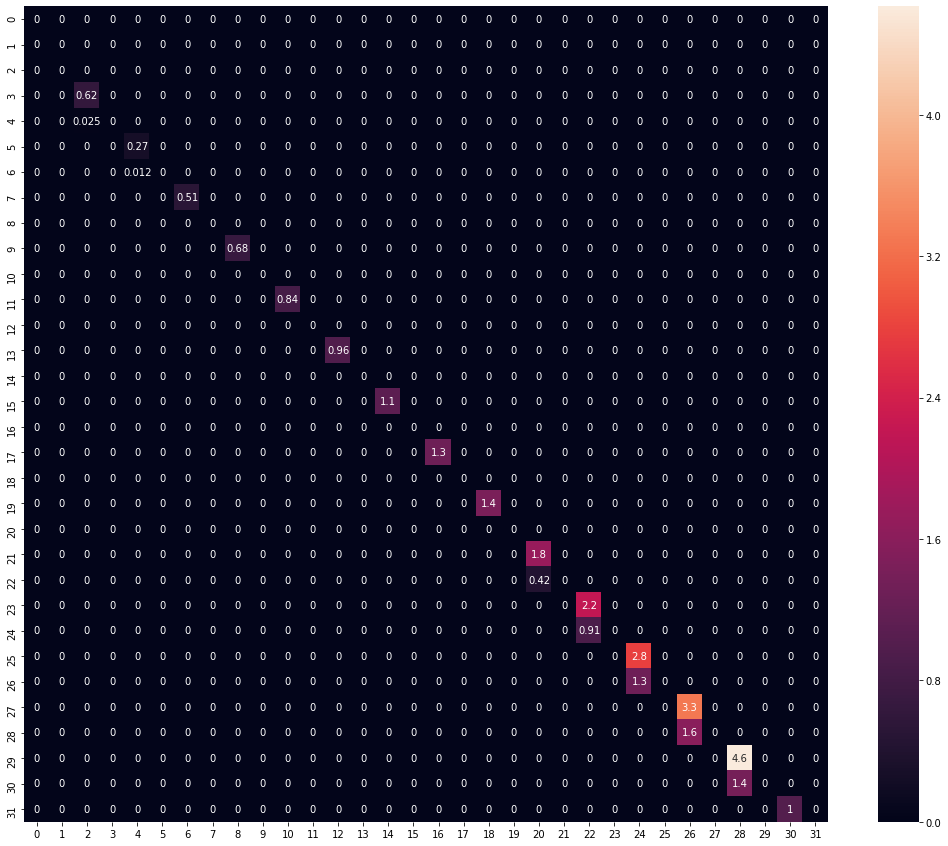

In [84]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [85]:
res_with_duals['res_norm']

array([[0.60206382]])

In [86]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 20

gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

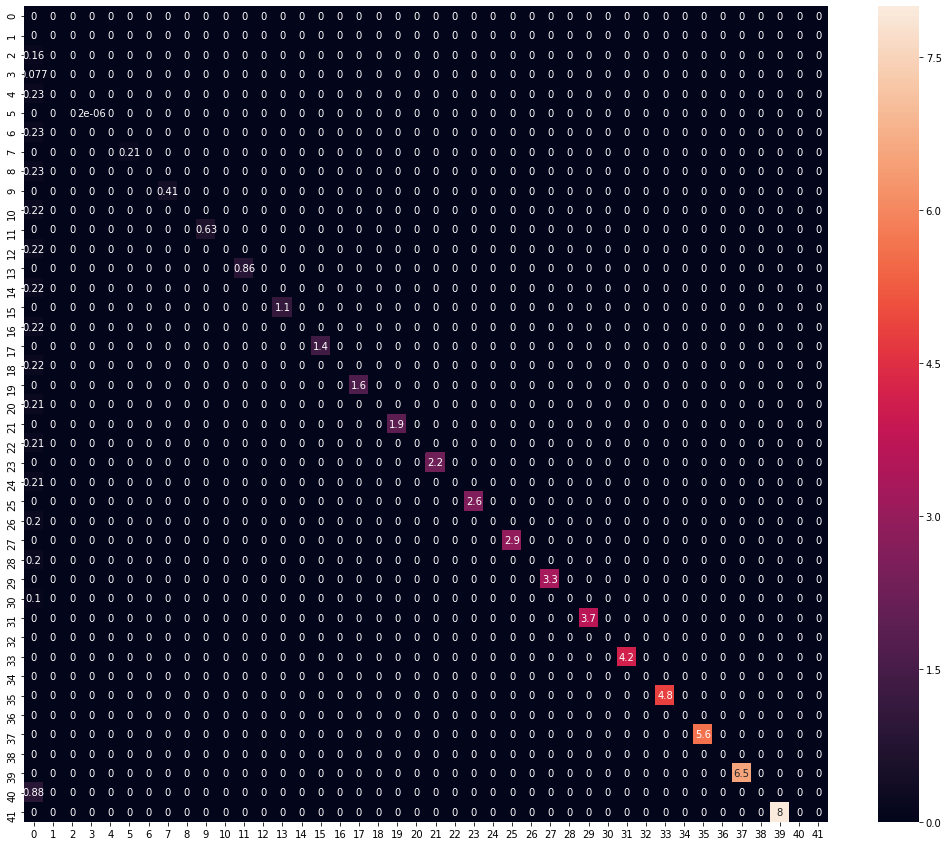

In [87]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

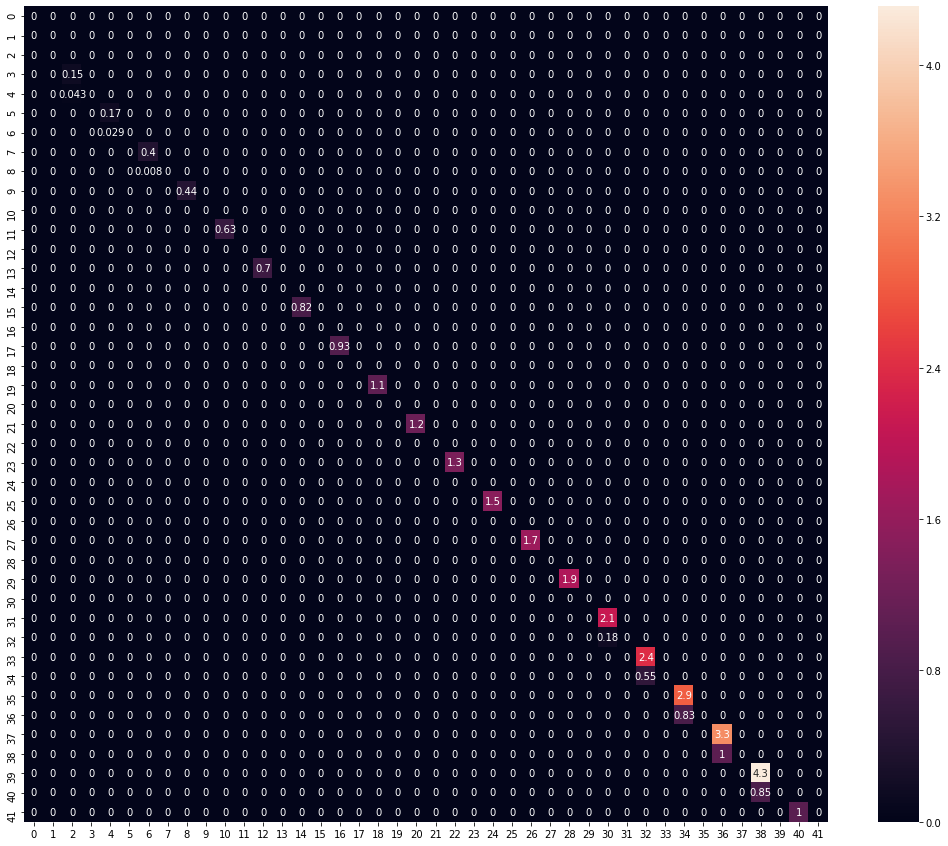

In [88]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [89]:
res_with_duals['res_norm']

array([[0.46978016]])

## $\gamma = \frac{1}{8L}$

In [90]:
L = 1.0
gamma = 1.0/(8*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

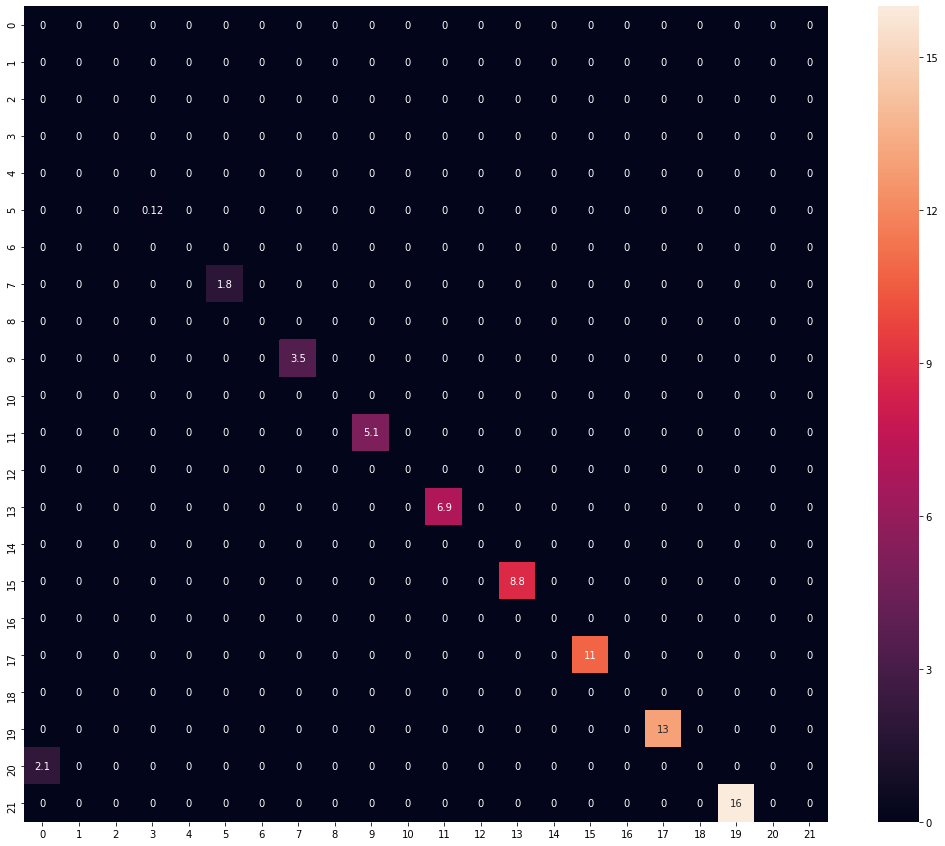

In [91]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

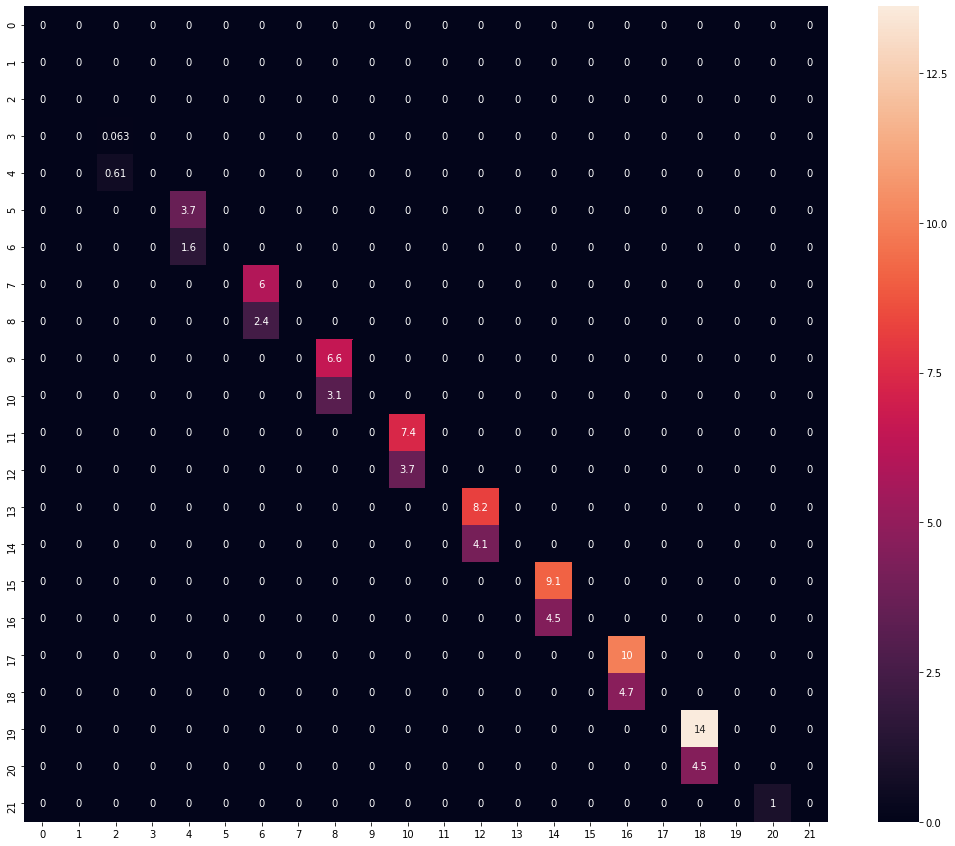

In [92]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [93]:
res_with_duals['res_norm']

array([[1.04773845]])

In [94]:
L = 1.0
gamma = 1.0/(8*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

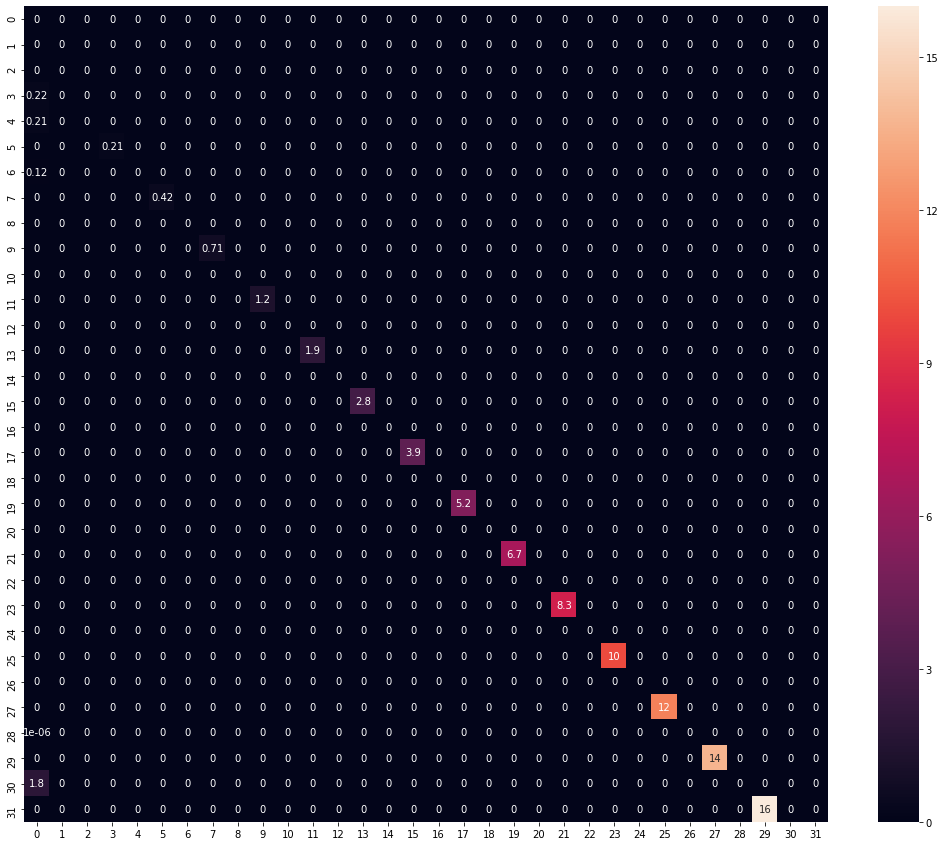

In [95]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

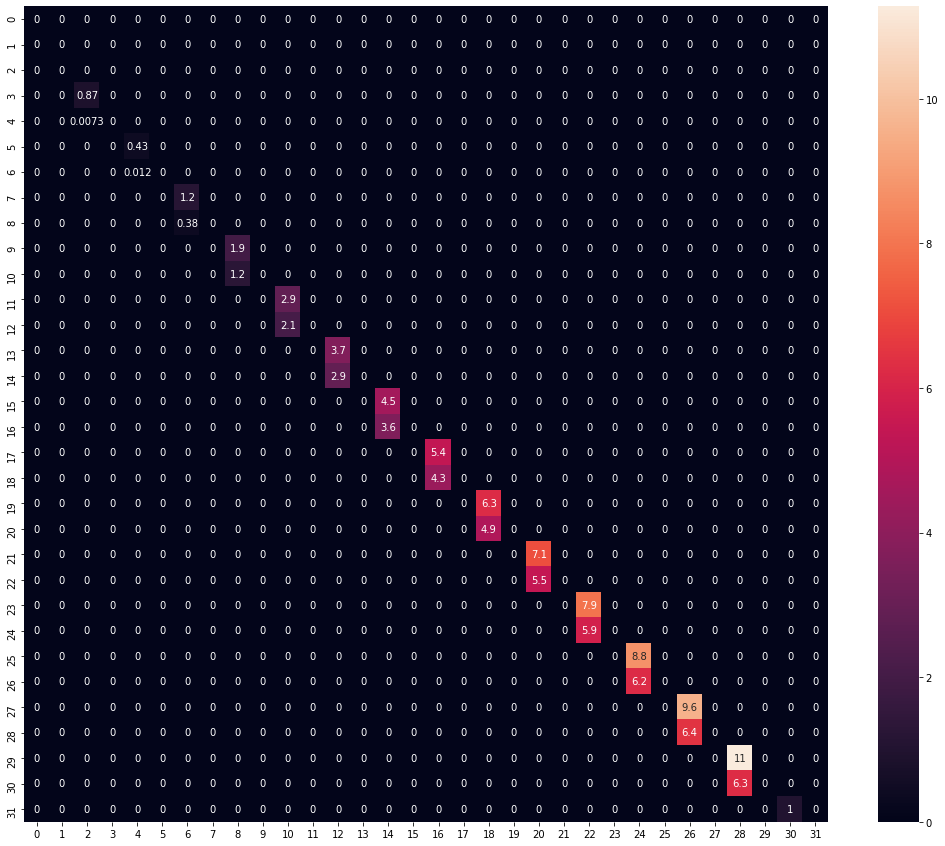

In [96]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [97]:
res_with_duals['res_norm']

array([[0.87217893]])

In [98]:
L = 1.0
gamma = 1.0/(8*L)
N_max = 20

gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)) or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

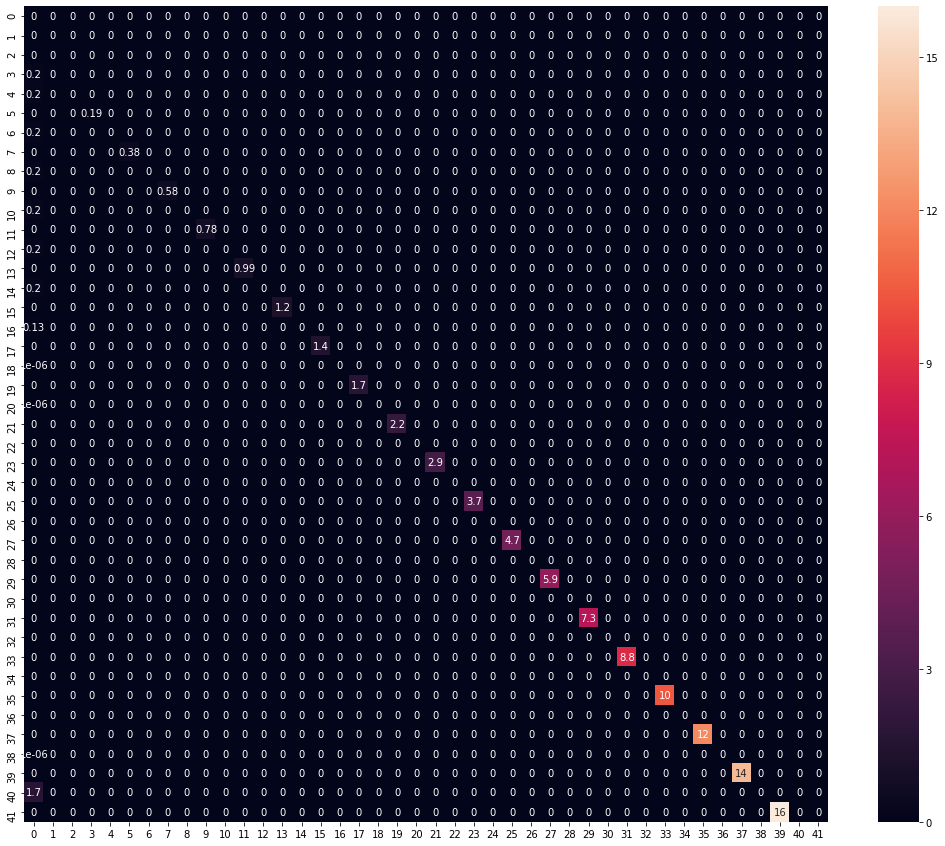

In [99]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

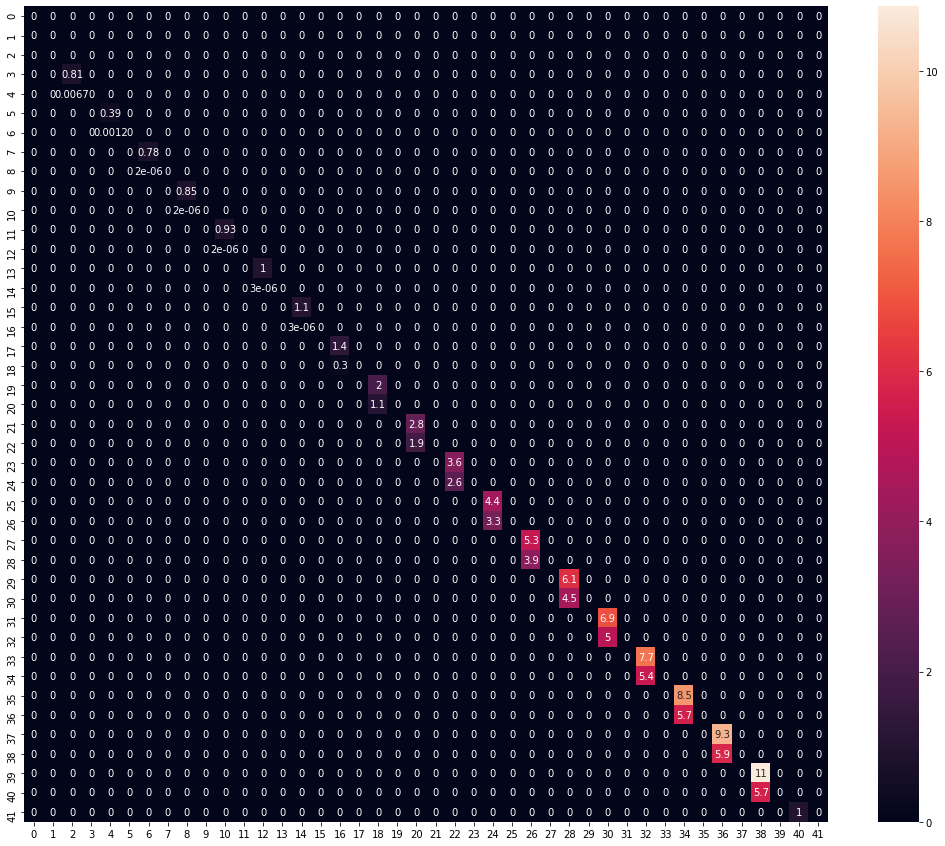

In [100]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [101]:
res_with_duals['res_norm']

array([[0.80666431]])

# EFTP: analysis of $\|F(x^N)\|^2$ (even more simplified constraints)

## $L = 1, \mu = 0$

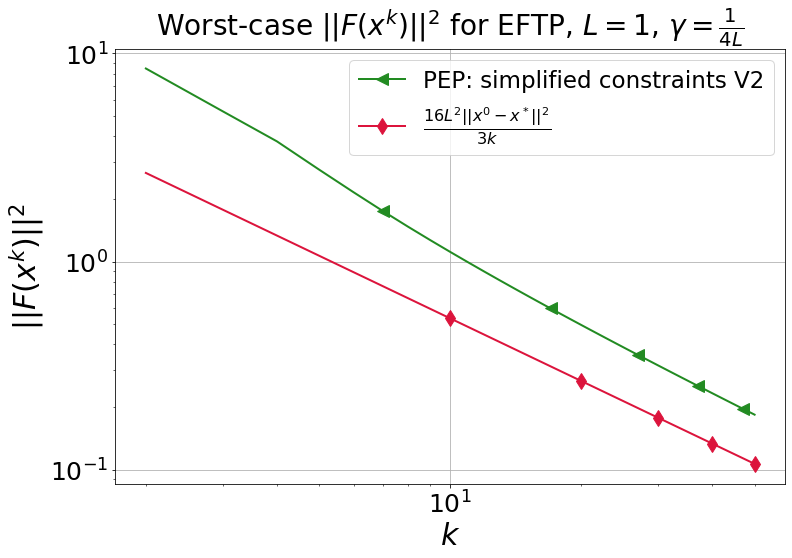

In [108]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 50

worst_case_sq_norm = np.array([])
worst_case_sq_norm_2_points = np.array([])
worst_case_sq_norm_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints_simpl = np.array([])
# worst_case_sq_norm_4_points = np.array([])
# worst_case_sq_norm_8_points = np.array([])
guessed_upper_bound = np.array([])

gamma_str = '%.6f' % gamma

for N in range(N_max-1):
#     res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm = np.append(worst_case_sq_norm, res['res_norm'][0][0])
#     res_2_points = scipy.io.loadmat('dump/EFTP_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
#     res_more = scipy.io.loadmat('dump/EFTP_2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_more_constraints = np.append(worst_case_sq_norm_more_constraints, res_more['res_norm'][0][0])
#     res_2_points_more = scipy.io.loadmat('dump/EFTP_2_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_2_points_more_constraints = np.append(worst_case_sq_norm_2_points_more_constraints, res_2_points_more['res_norm'][0][0])
    res_2_points_more_simpl = scipy.io.loadmat('dump/EFTP_2_simplified_V2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points_more_constraints_simpl = np.append(worst_case_sq_norm_2_points_more_constraints_simpl, res_2_points_more_simpl['res_norm'][0][0])
#     res_4_points = scipy.io.loadmat('dump/OG_norm_4_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_4_points = np.append(worst_case_sq_norm_4_points, res_4_points['res_norm'][0][0])
#     res_8_points = scipy.io.loadmat('dump/OG_norm_8_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_8_points = np.append(worst_case_sq_norm_8_points, res_8_points['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(N+2)))
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(x^k)||^2$ for EFTP, $L = 1$, $\gamma = \frac{1}{4L}$", fontsize=28)

# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm, linewidth=2,
#              markersize = 12, marker = "o",
#              markevery=range(0, N_max-1, 10), color="forestgreen",
#              label='PEP: all constraints')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_more_constraints, linewidth=2,
#              markersize = 12, marker = "o",
#              markevery=range(1, N_max-1, 10), color="pink",
#              label='PEP: all constraints V2')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points, linewidth=2,
#              markersize = 12, marker = "*",
#              markevery=range(2, N_max-1, 10), color="darkblue",
#              label='PEP: distance 2 constraints')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints, linewidth=2,
#              markersize = 12, marker = "*",
#              markevery=range(3, N_max-1, 10), color="purple",
#              label='PEP: distance 2 constraints V2')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints_simpl, linewidth=2,
             markersize = 12, marker = "<",
             markevery=range(5, N_max-1, 10), color="forestgreen",
             label='PEP: simplified constraints V2')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_4_points, linewidth=2,
#              markersize = 12, marker = "^",
#              markevery=range(4, N_max, 10), color="purple",
#              label='PEP: distance 4 constraints')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_8_points, linewidth=2,
#              markersize = 12, marker = ">",
#              markevery=range(6, N_max, 10), color="orange",
#              label='PEP: distance 8 constraints')
plt.semilogy(np.array(range(N_max-1))+2, guessed_upper_bound, linewidth=2, 
             markersize = 12, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{16L^2||x^0 - x^*||^2}{3k}$')


plt.legend(loc='upper right', fontsize=23)
plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

# plt.savefig("plot/EFTP_norm_L_"+str(L)+'_N_'+str(N_max)+".png", bbox_inches='tight')

# Guessing dual variables

## $L = 1, \mu = 0$

## $\gamma = \frac{1}{4L}$

In [154]:
L = 2.0
gamma = 1.0/(4*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

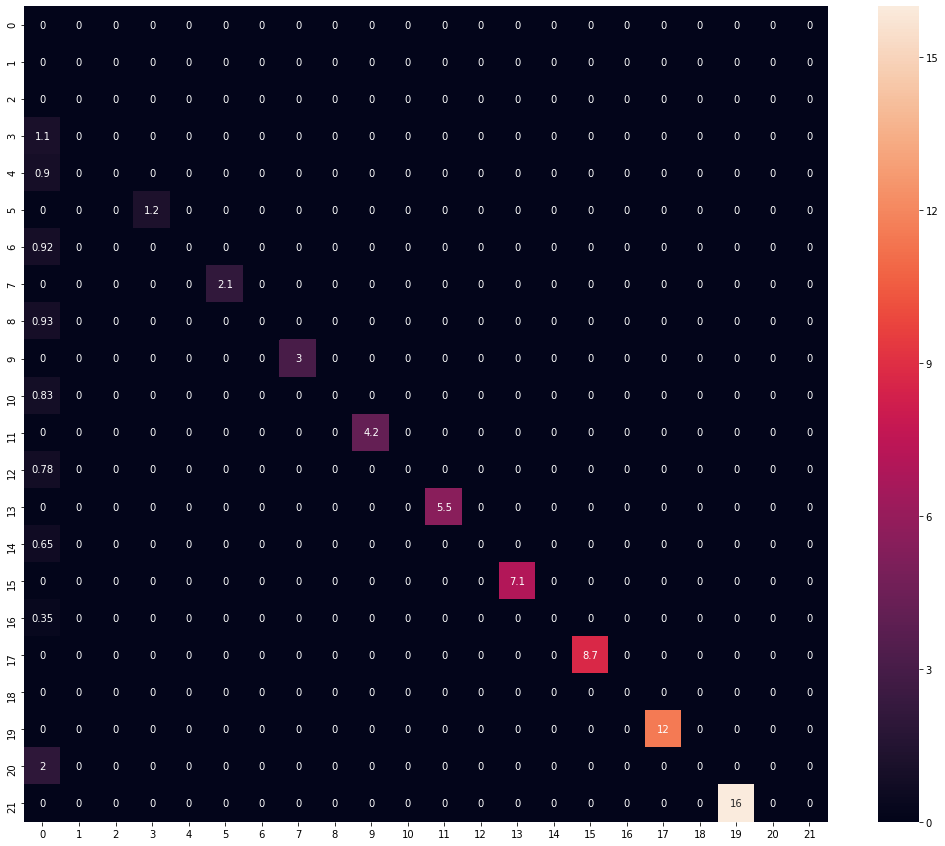

In [155]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

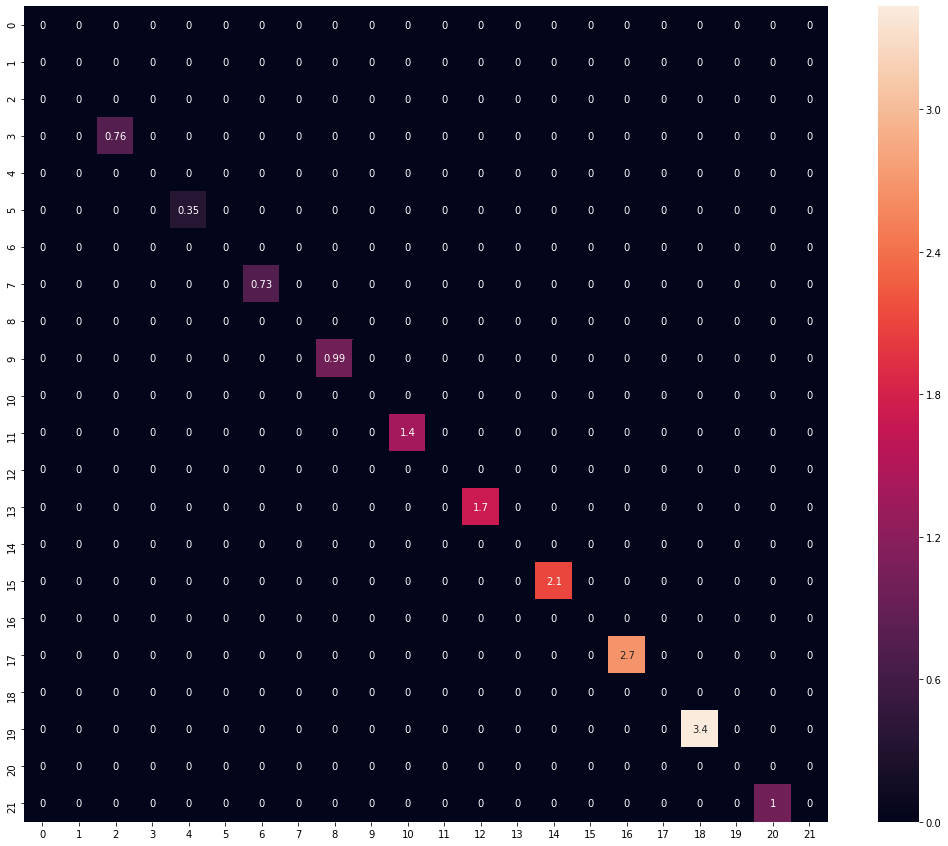

In [156]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [157]:
res_with_duals['res_norm']

array([[4.45075768]])

In [158]:
L = 2.0
gamma = 1.0/(4*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

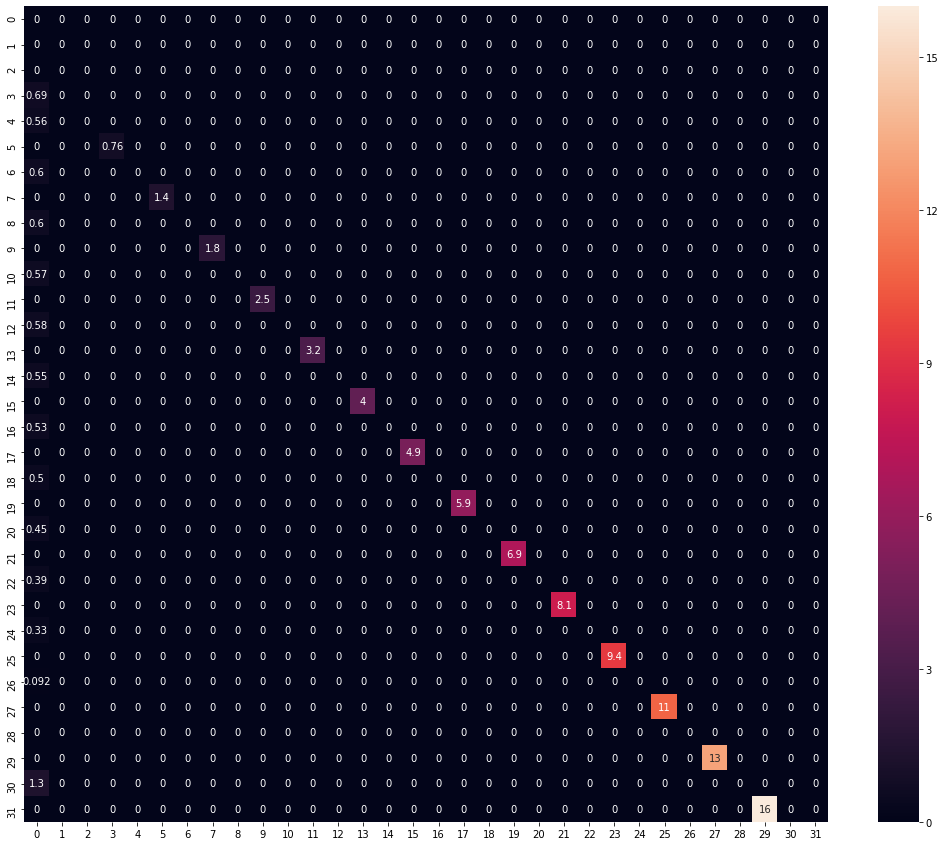

In [159]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

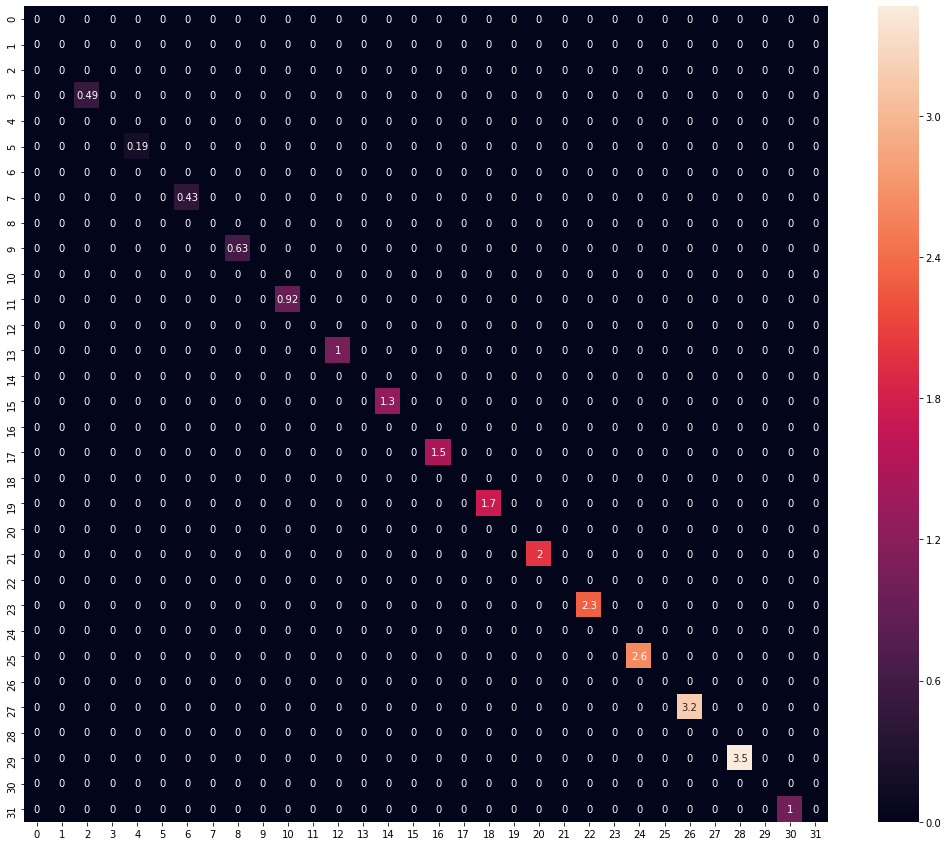

In [160]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [161]:
res_with_duals['res_norm']

array([[2.74975858]])

In [162]:
L = 2.0
gamma = 1.0/(4*L)
N_max = 20
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

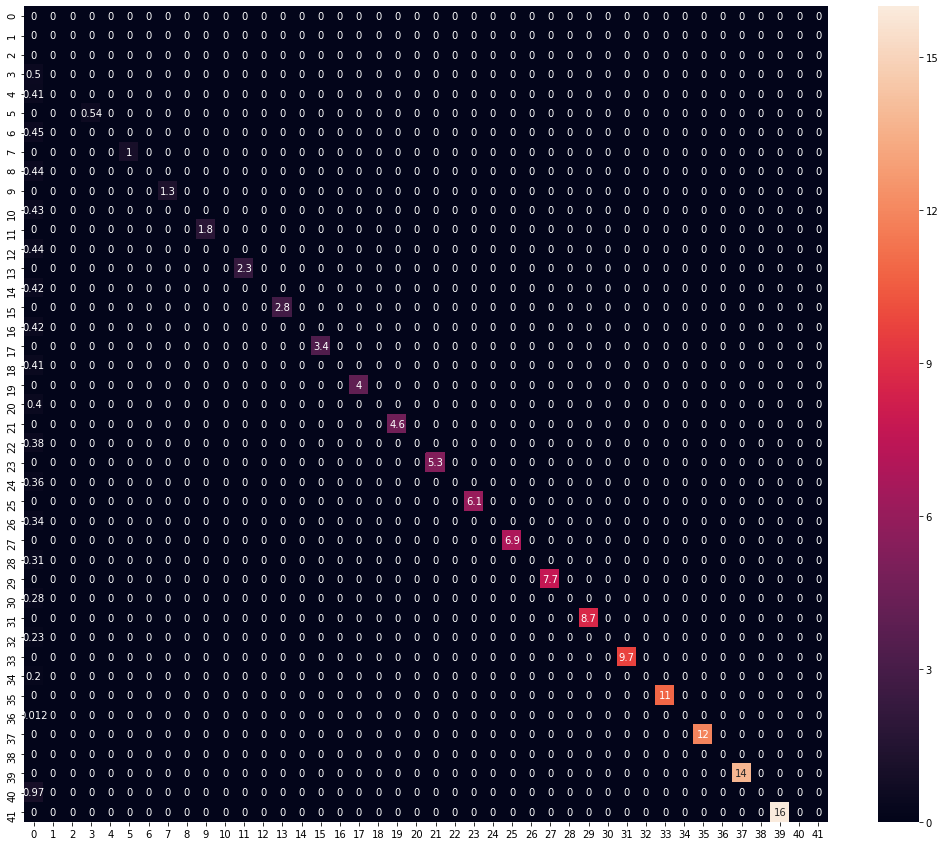

In [163]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

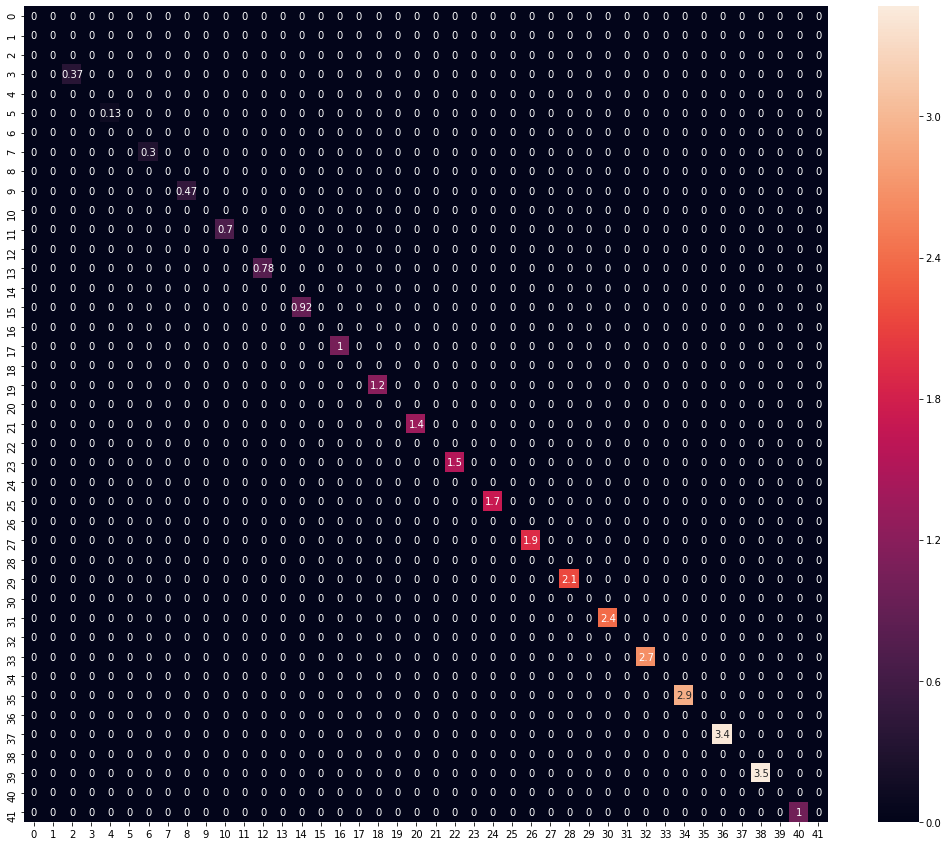

In [164]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [165]:
res_with_duals['res_norm']

array([[1.98271651]])

## $\gamma = \frac{1}{8L}$

In [134]:
L = 2.0
gamma = 1.0/(8*L)
N_max = 10
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

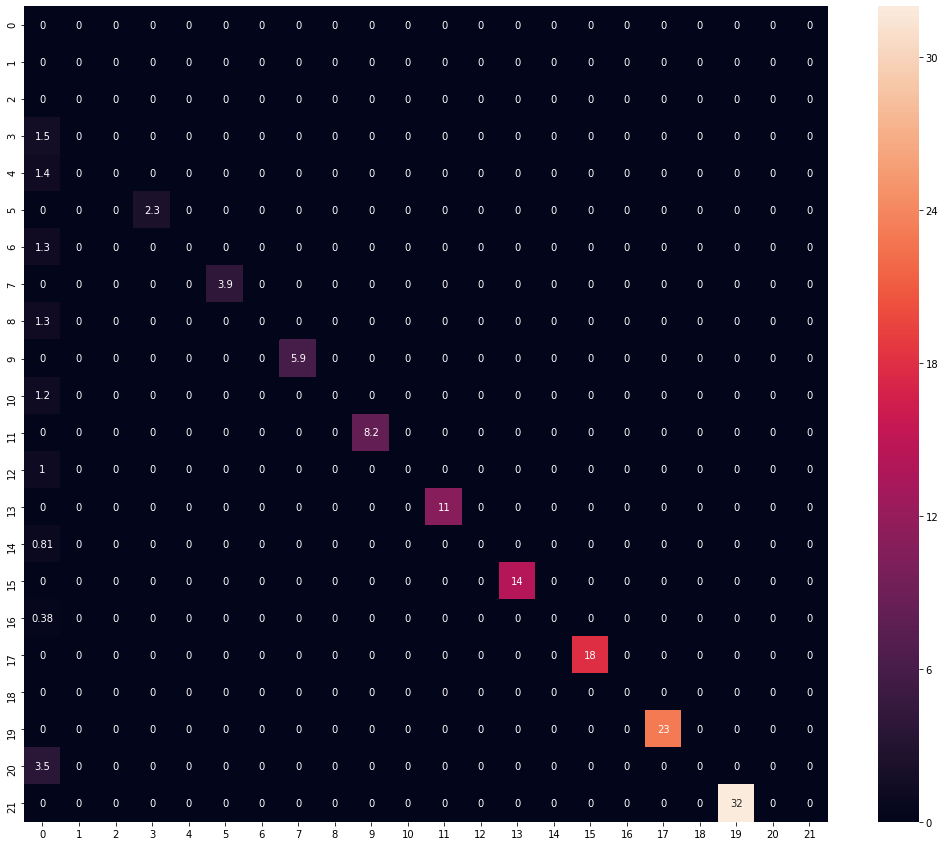

In [135]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

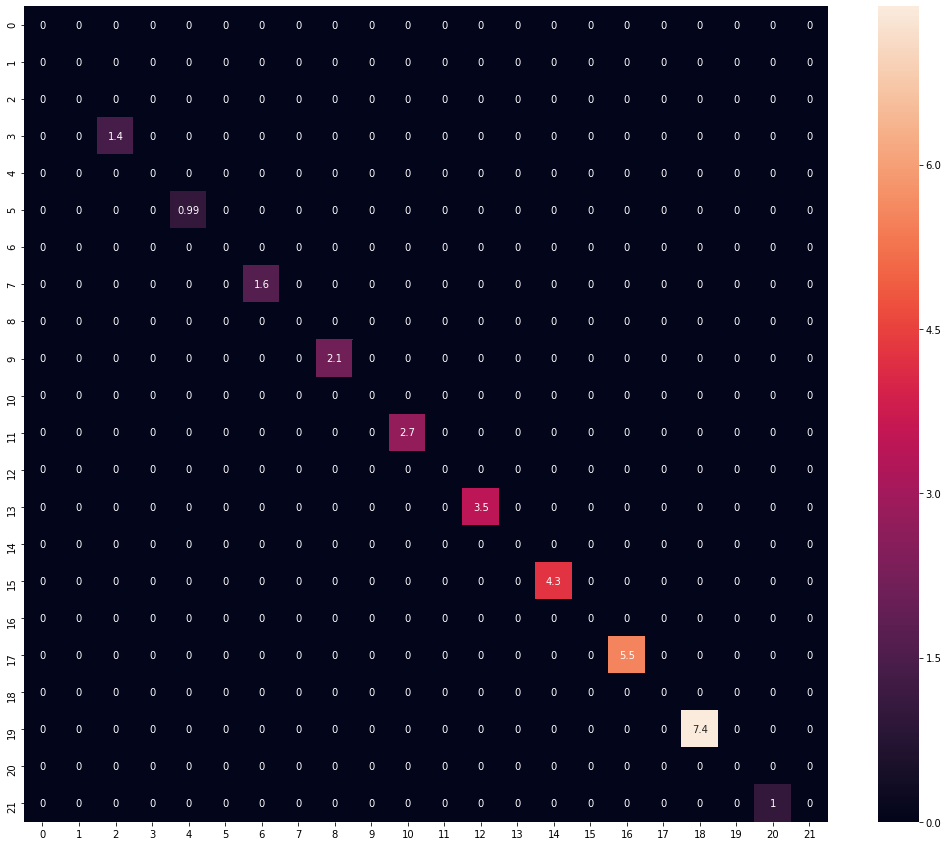

In [136]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [137]:
res_with_duals['res_norm']

array([[12.89378367]])

In [146]:
L = 2.0
gamma = 1.0/(8*L)
N_max = 15
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

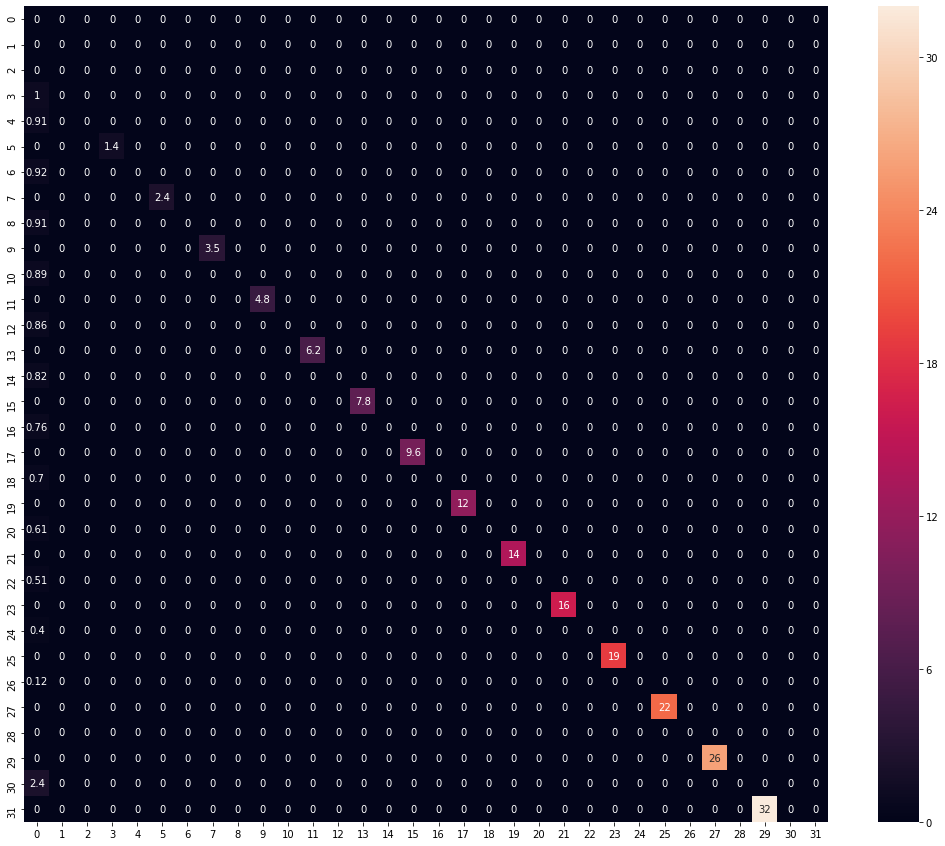

In [147]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

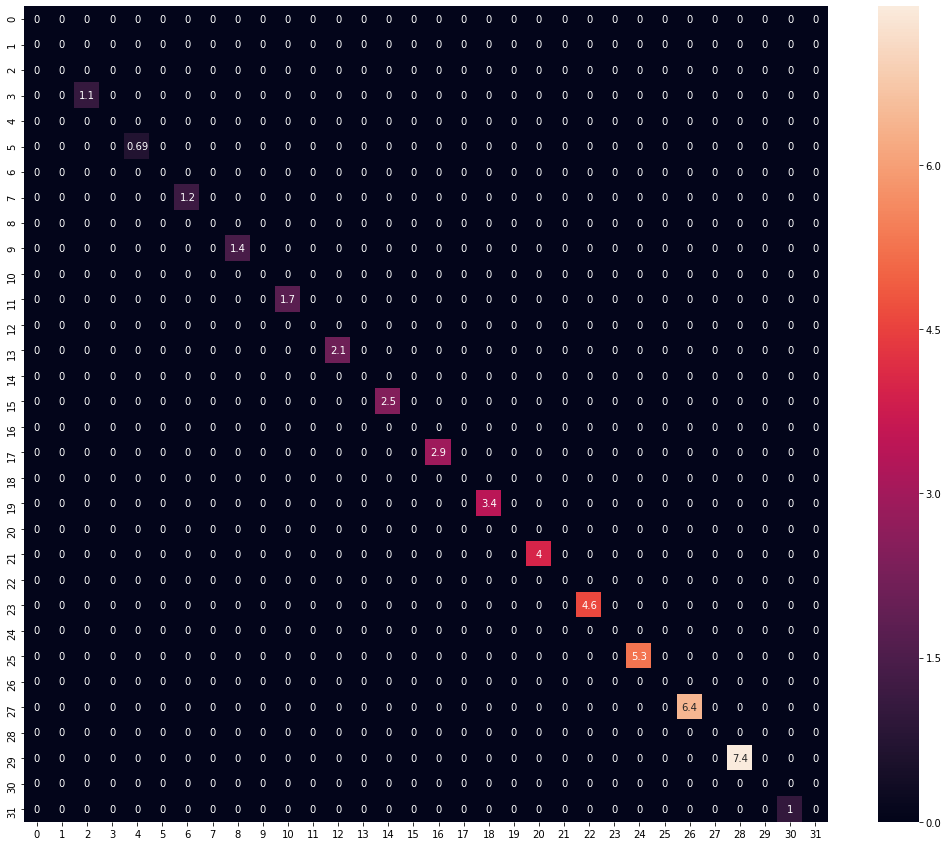

In [148]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [149]:
res_with_duals['res_norm']

array([[8.21305218]])

In [150]:
L = 2.0
gamma = 1.0/(8*L)
N_max = 20
gamma_str = '%.6f' % gamma

res_with_duals = scipy.io.loadmat('dump/EFTP_2_simplified_V2_dual_variables_L_'+str(int(L))+'_N_'+str(N_max)+'__'+gamma_str+'.mat')
monotonicity_weights = np.round_(np.array(res_with_duals['monotonicity_weights'][0]), decimals=6)
Lipschitzness_weights = np.round_(np.array(res_with_duals['Lipschitzness_weights'][0]), decimals=6)
monotonicity_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0
Lipschitzness_weights_matrix = np.zeros((2*N_max+2, 2*N_max+2))*1.0



idx1 = 0
idx2 = 0
for i in np.arange(1, 2*N_max+2):
    for j in np.arange(0, i):
        if (i!=j) and ((i!=2) or ((i==2) and (j==0))) and ((i-j <= 2) or (j==0)):
            if ((i%2 == 1) and (j == i-1) and (j != 0)): #or ((i%2 == 0) and (j == i-2) and (j != 0)):
                Lipschitzness_weights_matrix[i][j] = Lipschitzness_weights[idx1]
                idx1 += 1
            if ((i%2 == 0) and (j == 0)) or ((i%2 == 1) and (j == i-2) and (j != 0)) or ((i == 3) and (j == 0)):
                monotonicity_weights_matrix[i][j] = monotonicity_weights[idx2]
                idx2 += 1

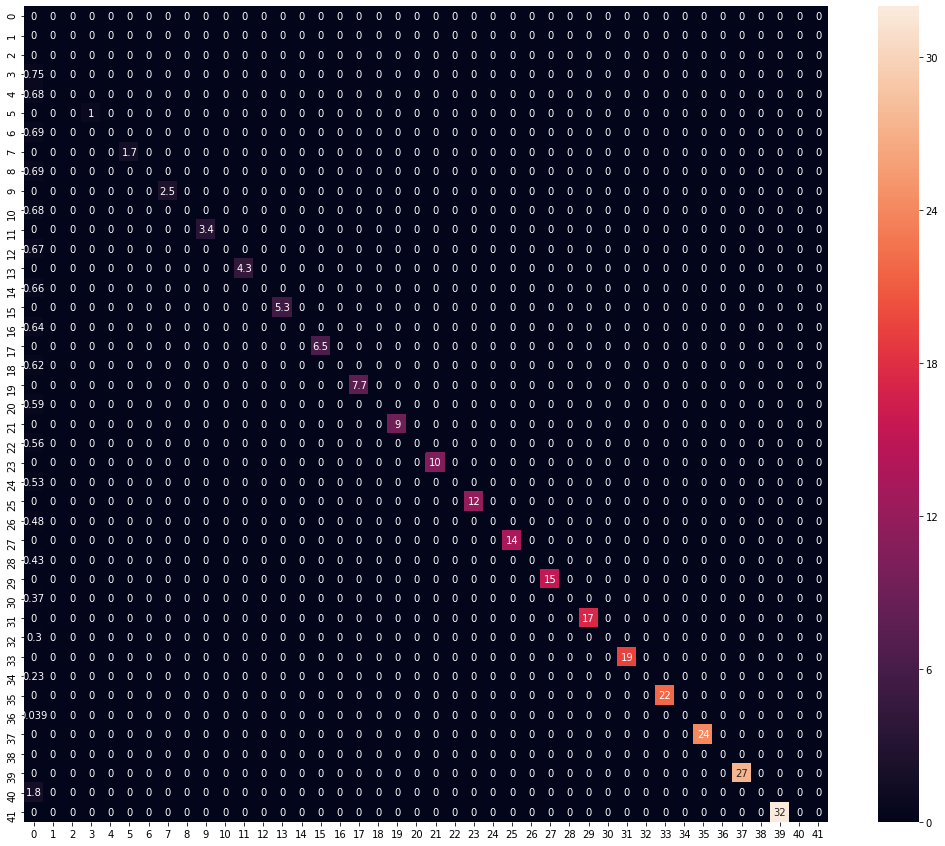

In [151]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(monotonicity_weights_matrix, annot=True)

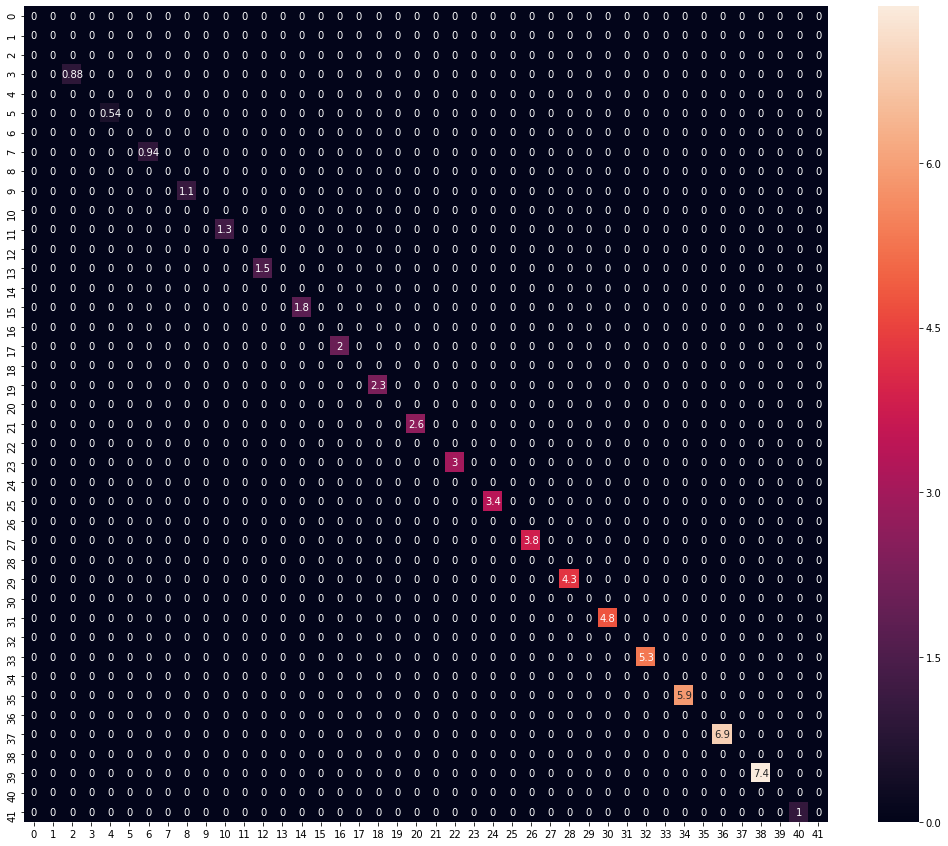

In [152]:
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(Lipschitzness_weights_matrix, annot=True)

In [153]:
res_with_duals['res_norm']

array([[6.01004469]])